In [5]:
import pandas as pd
import openpyxl
import numpy as np
#from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.spatial.distance as dis
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance as dist
import copy

In [6]:
basepath="/Users/kazuki/Documents/Study/test/data/ryukyu4/{}"
rflocate = basepath.format("parameter/locations.xlsx")
rfword   = basepath.format("parameter/sheetlist.xlsx")
rfpattern= basepath.format("gram3/pattern/all.xlsx")
picpath="/Users/kazuki/Documents/Study/test/data/ryukyu4/pic/{}"
gnumber=3

In [7]:
locateDf = pd.read_excel(rflocate, sheet_name=0, header=0, index_col=0)
wordDf  = pd.read_excel(rfword , sheet_name=0, header=0, index_col=0)

In [8]:
symbols=list(locateDf.iloc[:,0])
locates = list(locateDf.iloc[:,2])
hyouzi = list(locateDf.iloc[:,1])
words   = list(wordDf.iloc[:,0])

In [115]:
ptDf=pd.read_excel(rfpattern, sheet_name=0, header=0, index_col=0)

In [10]:
len(ptDf.index.str.contains('-9'))

28277

In [86]:
nonind=ptDf.index.str.contains('-9')
# ptDf=ptDf.loc[~nonind,:]
ptDf=ptDf.T
distanceMatrix=np.array(ptDf.values)

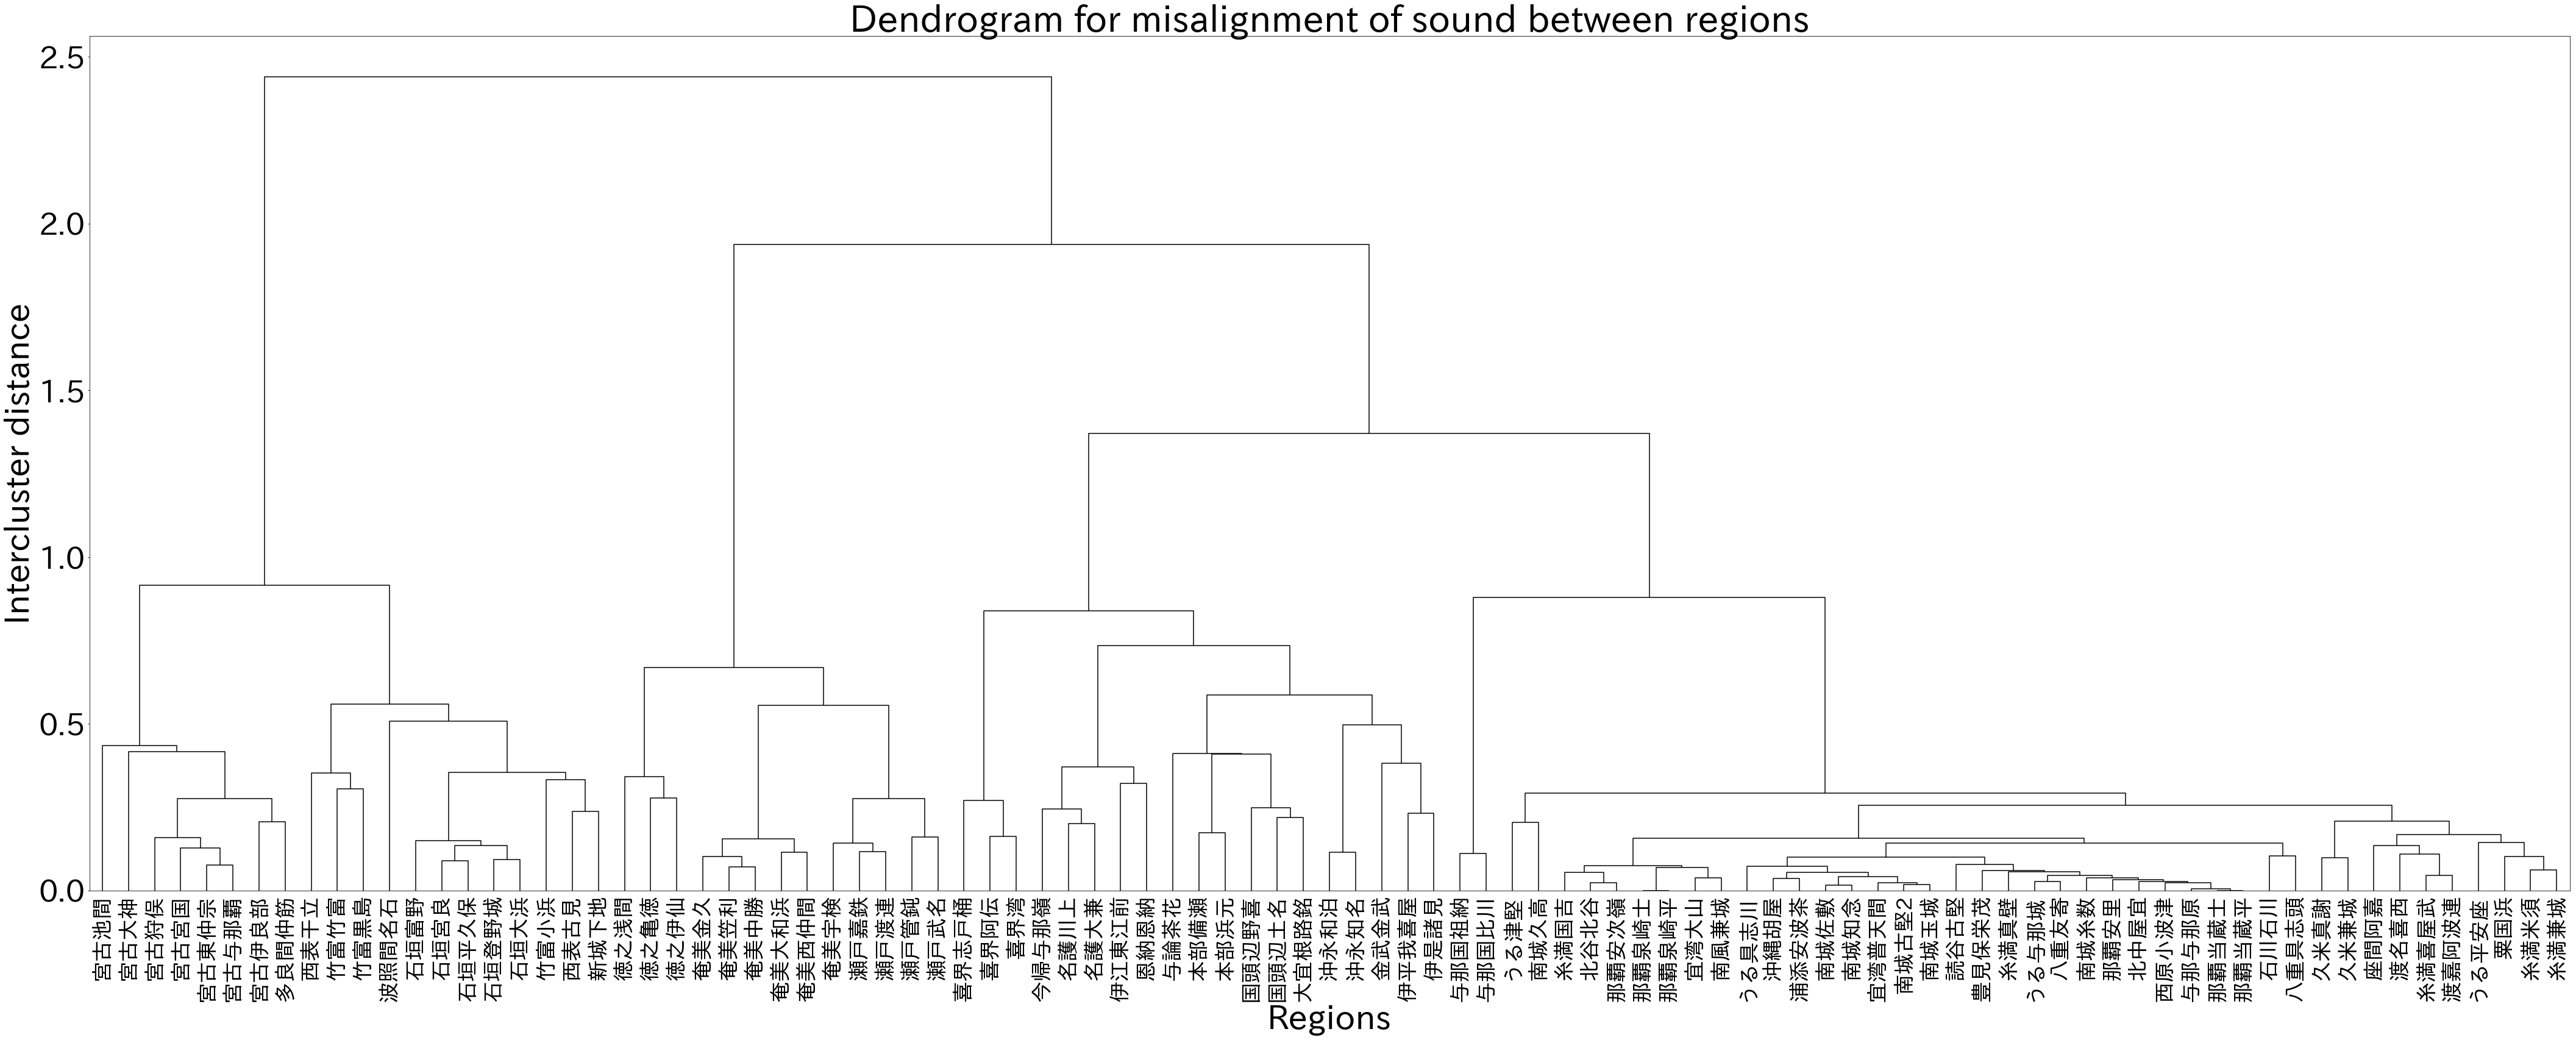

In [12]:
#図の生成
figtitle='Dendrogram for misalignment of sound between regions'
himethod='ward'
# savefile=basepath.format("gramTri/pic/dendAD.png")
pdis=dist.pdist(distanceMatrix,'cosine')
z = hierarchy.linkage(pdis, method=himethod,metric="cosine")

plt.figure(figsize=(60,25))
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 50
plt.title(figtitle, fontsize=60)
plt.xlabel('Regions', fontsize=55)
plt.ylabel('Intercluster distance', fontsize=55)
# hierarchy.set_link_color_palette(['purple', 'lawngreen', 'green', 'blue', 'orange', 'red']) # ６クラスタまでの色を指定
hierarchy.dendrogram(z, leaf_font_size=35., # 横軸の文字の大きさを指定
                        color_threshold=0., # ユークリッド平方距離が７以上を同色で表示
                        above_threshold_color='black',
                        labels=tuple(locates)) # ユークリッド平方距離が７以上を黒色に指定
plt.tight_layout()
# plt.savefig(savefile)
plt.show()
plt.close()

In [13]:
# 指定したクラスタ数でクラスタを得る関数を作る。
def get_cluster_by_number(result, number):
    output_clusters = []
    x_result, y_result = result.shape
    n_clusters = x_result + 1
    cluster_id = x_result + 1
    father_of = {}
    df1 = pd.DataFrame(result)
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in df1.index:
        n1 = int(df1.ix[i][0])
        n2 = int(df1.ix[i][1])
        val = df1.ix[i][2]
        n_clusters -= 1
        if n_clusters >= number:
            father_of[n1] = cluster_id
            father_of[n2] = cluster_id

        cluster_id += 1

    cluster_dict = {}
    for n in range(x_result + 1):
        if n not in father_of:
            output_clusters.append([n])
            continue

        n2 = n
        m = False
        while n2 in father_of:
            m = father_of[n2]
            #print [n2, m]
            n2 = m

        if m not in cluster_dict:
            cluster_dict.update({m:[]})
        cluster_dict[m].append(n)

    output_clusters += cluster_dict.values()

    output_cluster_id = 0
    output_cluster_ids = [0] * (x_result + 1)
    for cluster in sorted(output_clusters):
        for i in cluster:
            output_cluster_ids[i] = output_cluster_id
        output_cluster_id += 1

    return output_cluster_ids

In [14]:
labels=get_cluster_by_number(z,6)

/Users/kazuki/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/kazuki/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/Users/kazuki/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-

In [15]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5]


In [16]:
import folium
from folium.plugins import FastMarkerCluster

In [17]:
basepath2="/Users/kazuki/Documents/Study/data/ryukyu3/{}"
rfid=basepath2.format(
        "テスト用数値一覧・地点_緯度経度20190313.csv")
idodf=pd.read_csv(rfid,header=0,index_col=0)
# idokeido=idodf.loc["旧笠利町笠利":,["緯度","経度"]]

In [18]:
idokeido=idodf.loc["旧笠利町笠利":,["緯度","経度"]]

In [19]:
# color_set=["#000000","#800000",
#     "#ff0000","#800080",
#     "#ff8c00","#ff00ff",
#     "#008000","#808000",
#     "#000080","#ff6633"]
color_set=list(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [20]:
# copyright_osm = '&copy; <a href="http://osm.org/copyright">OpenStreetMap</a> contributors'

In [21]:
truelabel=[0 for i in locates]

In [22]:
print(truelabel)
print(len(truelabel))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
95


In [23]:
for i,loc in enumerate(locates):
    if i >= 93:
        truelabel[i]=5
    elif i>=81 and i < 93:
        truelabel[i]=4
    elif i>=73 and i<81:
        truelabel[i]=3
    elif i>=32 and i<73:
        truelabel[i]=2
    elif i>=16 and i<32:
        truelabel[i]=1
    elif i>=0 and i<16:
        truelabel[i]=0

In [24]:
print(truelabel)
print(len(truelabel))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5]
95


# ラベルの一致

In [25]:
truelabels2=[0 for i in locates]
asignlabels=[0 for i in range(6)]
locindex=[0,16,32,73,81,93,95]
for i in range(6):
    a=i
    b=labels[locindex[i]:locindex[i+1]]
#     print(b)
    labels_unique=sorted(list(set(b)))
    print(labels_unique)
    label_c=[0 for j in labels_unique]
    for j,jc in enumerate(labels_unique):
        label_c[j]=b.count(jc)
    souwa=sum(label_c)
    for j,jc in enumerate(labels_unique):
        label_c[j]=label_c[j]/sum(label_c)
#     print(label_c)
    asignlabels[i]=labels_unique[label_c.index(max(label_c))]
#     print(asignlabels)
for i in range(len(locates)):
    truelabels2[i]=asignlabels.index(labels[i])

[0, 1]
[1]
[2]
[3]
[4]
[5]


In [26]:
print(truelabels2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5]


In [27]:
# 一致率の計算
seihi=0
for a,b in zip(truelabel,truelabels2):
    if a==b:
        seihi=seihi+1
seihi=seihi/len(truelabel)
print(seihi)

0.968421052631579


In [28]:
_map = folium.Map(location=list(idokeido.iloc[25,:].values),
                  attr="Stamen Watercolor")
for i,(idkd,label) in enumerate(zip(list(idokeido.values),truelabels2)):
    folium.CircleMarker(
        popup='{}'.format(hyouzi[i]),
        location= idkd,
        radius=4,
        color=color_set[label],
        fill=True,
        fill_color=color_set[label]
    ).add_to(_map)
# _map.save(basepath.format("gram3/pic/map-N3-D.html"))
# _map.save(picpath.format("map-N{}-D.html".format(gnumber)))

In [29]:
_map

In [30]:
new_color=[0 for i in range(6)]
new_color_ind=[4,3,0,5,2,1]
for i in range(6):
    new_color[i]=color_set[new_color_ind[i]]

In [31]:
print(new_color)
print(color_set)

['#9467bd', '#d62728', '#1f77b4', '#8c564b', '#2ca02c', '#ff7f0e']
['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


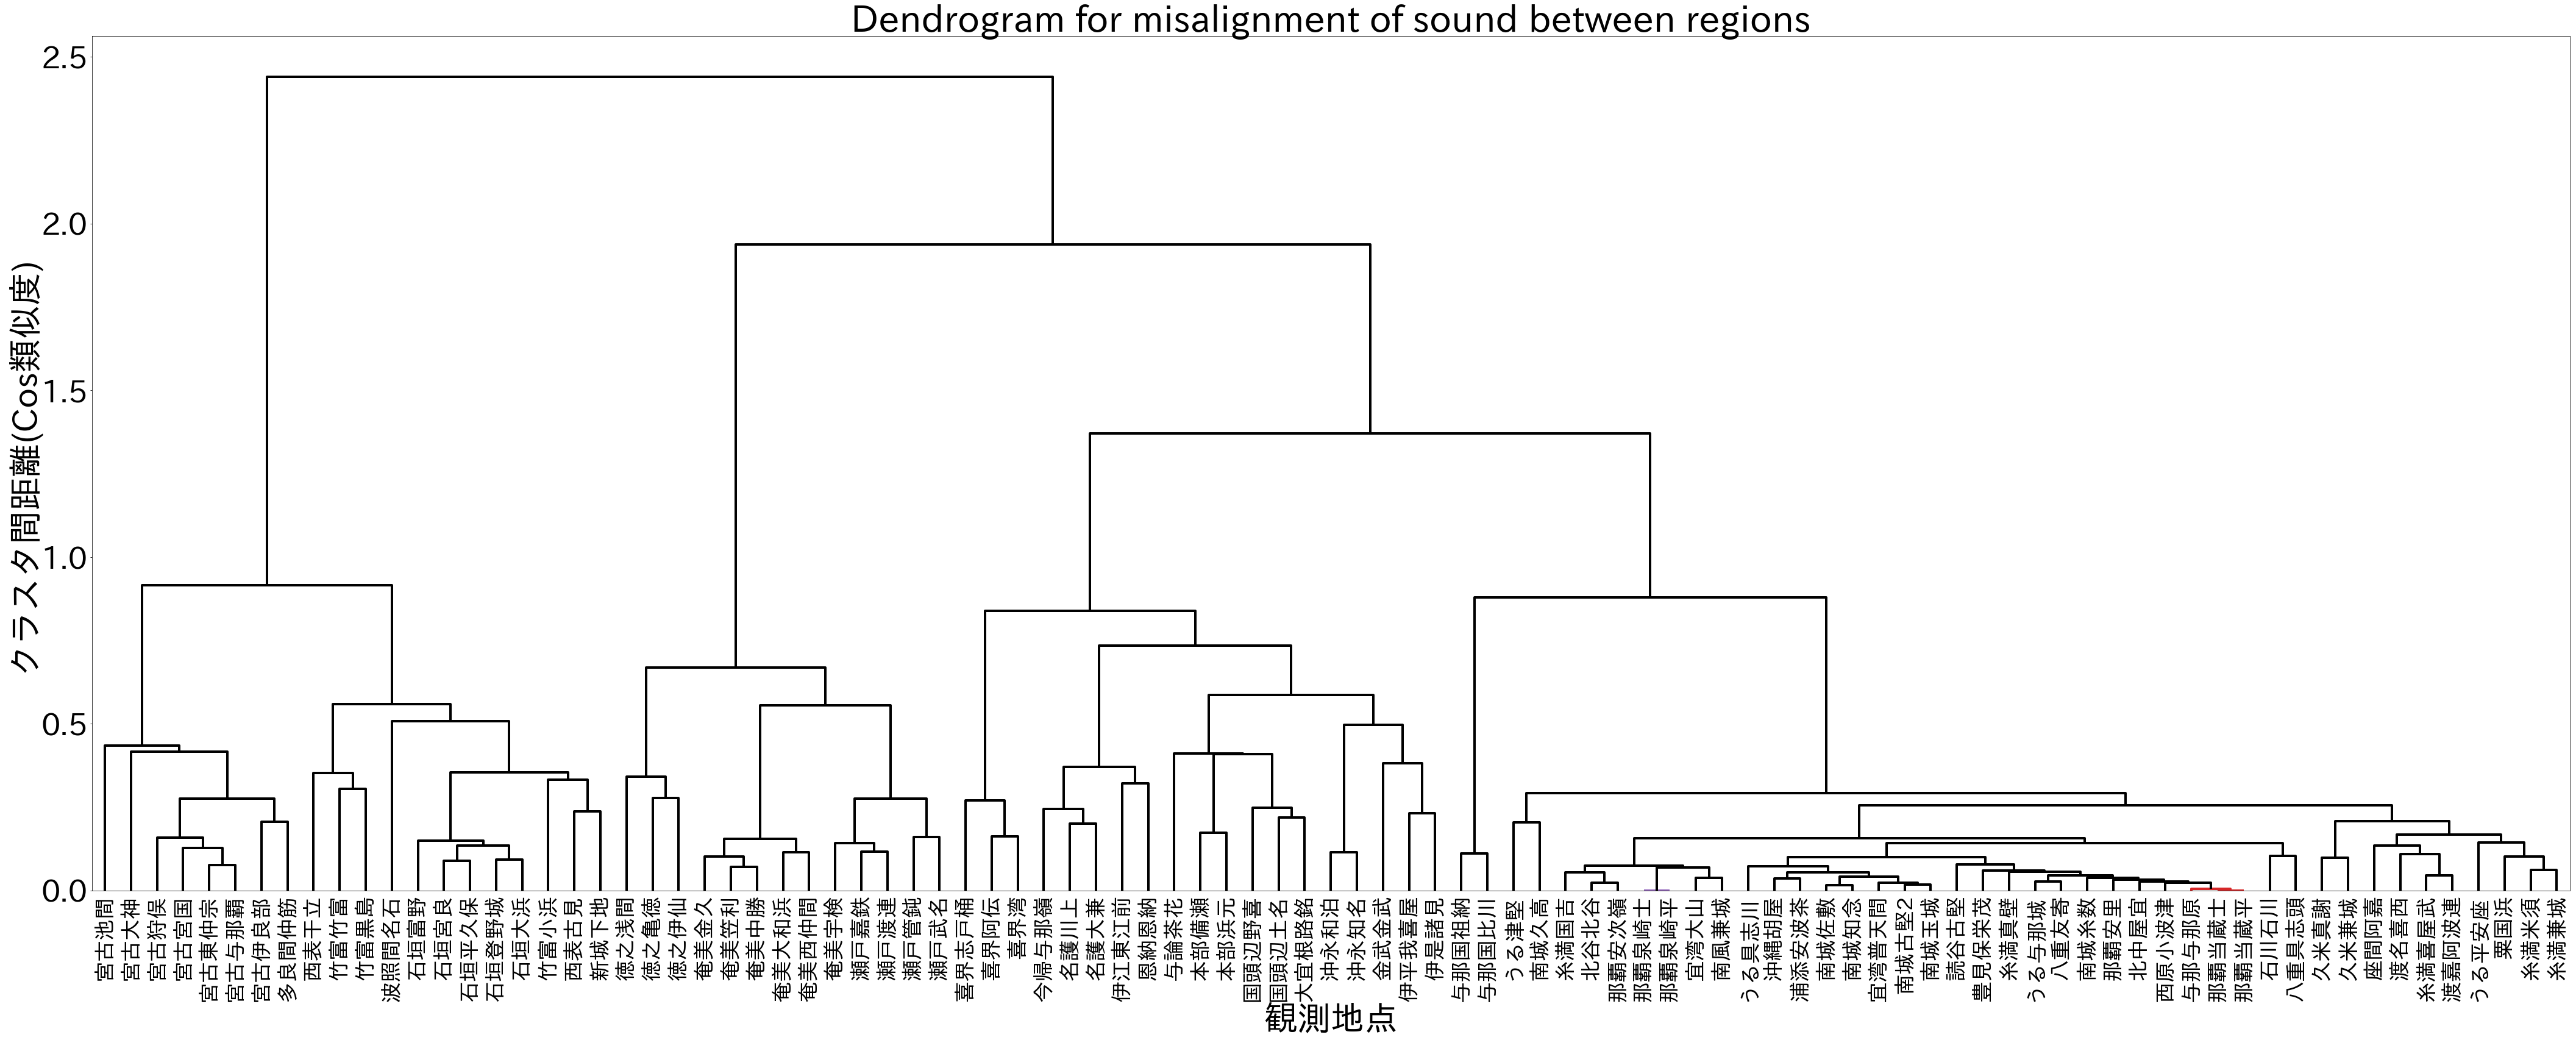

In [32]:
plt.figure(figsize=(60,25))
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 50
plt.rcParams['lines.linewidth'] = 4
plt.title(figtitle, fontsize=60)
plt.xlabel('観測地点', fontsize=55)
plt.ylabel('クラスタ間距離(Cos類似度)', fontsize=55)
hierarchy.set_link_color_palette(new_color)
# hierarchy.set_link_color_palette(['purple', 'lawngreen', 'green', 'blue', 'orange', 'red']) # ６クラスタまでの色を指定
hierarchy.dendrogram(z, leaf_font_size=35., # 横軸の文字の大きさを指定
                        color_threshold=0.005, # ユークリッド平方距離が７以上を同色で表示
                        above_threshold_color='black',
                        labels=tuple(locates)) # ユークリッド平方距離が７以上を黒色に指定
plt.tight_layout()
# plt.savefig(picpath.format("dend-N{}-D.png".format(gnumber)))
plt.show()
plt.close()

In [33]:
ab=[truelabel.count(i) for i in range(6)]
print(ab)
c=0
for i in range(6):
    print(ab[i],truelabels2[c:sum(ab[0:i+1])].count(i),len(truelabels2[c:sum(ab[0:i+1])]))
    c+=ab[i]

[16, 16, 41, 8, 12, 2]
16 13 16
16 16 16
41 41 41
8 8 8
12 12 12
2 2 2


# 平均値、分散地の分析
1. ラベルごとに地点データの分割
2. 平均値を算出
3. 分散地、今日分散地を算出
4. 

In [34]:
print(truelabels2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5]


In [35]:
labelIndexs=[[j  for j,label in enumerate(truelabels2) if i==label]for i in range(6)]
print(labelIndexs)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 14, 15], [10, 11, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72], [73, 74, 75, 76, 77, 78, 79, 80], [81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92], [93, 94]]


In [36]:
print(ptDf.head)

<bound method NDFrame.head of        -c -v -c->-c -v -c  -c -v -c->-c -v gw  -c -v -c->-c -v w  \
奄美笠利                    0                   0                  0   
奄美金久                    0                   0                  0   
奄美中勝                    0                   0                  0   
奄美大和浜                   0                   0                  0   
奄美西仲間                   0                   0                  0   
奄美宇検                    0                   0                  0   
瀬戸管鈍                    0                   0                  0   
瀬戸武名                    0                   0                  0   
瀬戸嘉鉄                    0                   0                  0   
瀬戸渡連                    0                   0                  0   
喜界志戸桶                   0                   0                  0   
喜界阿伝                   51                   0                  1   
喜界湾                    51                   0                  1   
徳之浅間              

In [37]:
len(ptDf.index.str.contains('-9'))

95

In [36]:
print(ptDf.columns.str.contains("-9"))

[ True  True  True ... False False False]


In [102]:
nonind=ptDf.columns.str.contains('-9')
ptDf2=ptDf.loc[:,~nonind]
print(ptDf2)

       -c -v -c->-c -v -c  -c -v -c->-c -v gw  -c -v -c->-c -v w  \
奄美笠利                    0                   0                  0   
奄美金久                    0                   0                  0   
奄美中勝                    0                   0                  0   
奄美大和浜                   0                   0                  0   
奄美西仲間                   0                   0                  0   
奄美宇検                    0                   0                  0   
瀬戸管鈍                    0                   0                  0   
瀬戸武名                    0                   0                  0   
瀬戸嘉鉄                    0                   0                  0   
瀬戸渡連                    0                   0                  0   
喜界志戸桶                   0                   0                  0   
喜界阿伝                   51                   0                  1   
喜界湾                    51                   0                  1   
徳之浅間                    0                   0   

In [104]:
gptDfs=[ptDf2.iloc[inds,:] for inds in labelIndexs]

In [41]:
#要素ごとの全平均
AVT=np.mean(ptDf2.values,axis=0)

In [105]:
#各要素のグループの平均
AVs=[np.mean(gptDfs[g].values,axis=0) for g in range(6)]

In [106]:
print(len(AVs[0]))
print(len(ptDf2.columns))

24932
24932


In [107]:
print(len(avhindoDf.index))

6


In [108]:
print(len(AVT))

24932


In [110]:
hindowf=basepath.format("地域別平均頻度.xlsx")
avhindoDf=pd.DataFrame(AVs,index=["奄美","沖縄北部","沖縄中南部","宮古","八重山","与那国"],columns=ptDf2.columns)

In [111]:
avhindoDf

-c -v -c->-c -v -c  -c -v -c->-c -v gw  -c -v -c->-c -v w  \
奄美               0.000000            0.000000           0.000000   
沖縄北部            32.473684            0.052632           0.263158   
沖縄中南部           48.512195            0.000000           0.195122   
宮古               0.250000            0.000000           1.000000   
八重山              0.333333            0.000000           0.250000   
与那国              0.000000            0.000000           1.000000   

       -c -v -c->-c i -c  -c -v -c->-c i b  -c -v -c->-c i: r  \
奄美              0.769231          0.000000           0.461538   
沖縄北部            5.368421          0.105263           0.315789   
沖縄中南部           0.000000          0.000000           0.000000   
宮古              0.000000          0.000000           0.000000   
八重山             0.333333          0.000000           0.166667   
与那国             0.000000          0.000000           0.000000   

       -c -v -c->-c o -c  -c -v -c->-c u -c  -c -v -c->-c u n2  \
奄美                   0.0                0.0                0.0   
沖縄北部                 0.0                0.0                0.0   
沖縄中南部                0.0                0.0                0.0   
宮古                   0.0                0.0                0.0   
八重山                  0.5                0.0                0.0   
与那国                  0.0                0.5                0.5   

       -c -v -c->-c u w  ...  z u <e>->z u <e>  z y z->-c -v ?j  \
奄美             0.000000  ...             0.000         1.000000   
沖縄北部           0.000000  ...             0.000         0.631579   
沖縄中南部          0.000000  ...             0.000         0.097561   
宮古             0.000000  ...             6.125         0.000000   
八重山            0.166667  ...             0.000         0.000000   
与那国            0.000000  ...             0.000         0.000000   

       z y z->-c -v j  z y z->-c i dz  z y z->-c i j  z y z->-c y -c  \
奄美           0.000000        0.000000       0.000000           0.000   
沖縄北部         0.210526        0.000000       0.157895           0.000   
沖縄中南部        0.000000        0.000000       0.902439           0.000   
宮古           0.000000        0.000000       0.000000           0.125   
八重山          0.083333        0.666667       0.166667           0.000   
与那国          0.000000        0.000000       1.000000           0.000   

       z y z->-c y dz  z y z->-c y z  z y z->z -v z  z y z->z y z  
奄美           0.000000           0.00            0.0         0.000  
沖縄北部         0.000000           0.00            0.0         0.000  
沖縄中南部        0.000000           0.00            0.0         0.000  
宮古           0.000000           0.25            0.5         0.125  
八重山          0.083333           0.00            0.0         0.000  
与那国          0.000000           0.00            0.0         0.000  

[6 rows x 24932 columns]

In [112]:
for i,j in enumerate(ptDf2.columns):
    print(avhindoDf.iloc[:,i])

奄美        0.000000
沖縄北部     32.473684
沖縄中南部    48.512195
宮古        0.250000
八重山       0.333333
与那国       0.000000
Name: -c -v -c->-c -v -c, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -c -v -c->-c -v gw, dtype: float64
奄美       0.000000
沖縄北部     0.263158
沖縄中南部    0.195122
宮古       1.000000
八重山      0.250000
与那国      1.000000
Name: -c -v -c->-c -v w, dtype: float64
奄美       0.769231
沖縄北部     5.368421
沖縄中南部    0.000000
宮古       0.000000
八重山      0.333333
与那国      0.000000
Name: -c -v -c->-c i -c, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -c -v -c->-c i b, dtype: float64
奄美       0.461538
沖縄北部     0.315789
沖縄中南部    0.000000
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: -c -v -c->-c i: r, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.5
与那国      0.0
Name: -c -v -c->-c o -c, dt

Name: -c -v n->m u m, dtype: float64
奄美       7.692308
沖縄北部     1.578947
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -c -v n->m u n, dtype: float64
奄美        0.000000
沖縄北部      0.526316
沖縄中南部    10.243902
宮古       57.250000
八重山       6.666667
与那国       0.500000
Name: -c -v n->n2 -v n, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.487805
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -c -v n->n2: -v n, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: -c -v n2->-c -v n2, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: -c -v n2->-c i -c, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: -c -v n2->-c i n2, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000


奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       4.5
八重山      0.0
与那国      0.0
Name: -c a k->-c a k, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -c a k->? a -c, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.375
八重山      0.000
与那国      3.000
Name: -c a n->-c a n, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.375
八重山      0.000
与那国      0.000
Name: -c a n->-c a n2, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      2.5
与那国      0.0
Name: -c a n->b a n, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       2.25
八重山      0.25
与那国      0.00
Name: -c a n->b a n2, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -c a n->gw a n2, dtype: float64
奄美       0.000000
沖縄北部     1.263158
沖縄中南部    0.073171
宮古       0.000000
八重山      0.000000
与那国      0.000

Name: -c i h->w u k, dtype: float64
奄美       44.000000
沖縄北部     27.789474
沖縄中南部     4.292683
宮古        0.000000
八重山       0.000000
与那国       0.000000
Name: -c i j->-c -v ?j, dtype: float64
奄美       0.000000
沖縄北部     9.263158
沖縄中南部    0.000000
宮古       0.000000
八重山      3.666667
与那国      0.000000
Name: -c i j->-c -v j, dtype: float64
奄美        0.000000
沖縄北部      0.000000
沖縄中南部     0.000000
宮古        0.000000
八重山      29.333333
与那国       0.000000
Name: -c i j->-c i dz, dtype: float64
奄美        0.000000
沖縄北部      6.947368
沖縄中南部    39.707317
宮古        0.000000
八重山       7.333333
与那国      44.000000
Name: -c i j->-c i j, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       5.5
八重山      0.0
与那国      0.0
Name: -c i j->-c y -c, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      3.666667
与那国      0.000000
Name: -c i j->-c y dz, dtype: float64
奄美        0.0
沖縄北部      0.0
沖縄中南部     0.0
宮古       11.0
八重山       0.0
与那国       0.0
Name: -c i j->-c

Name: -c o g->-c on k, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.375
八重山      0.000
与那国      0.000
Name: -c o g->-c u f, dtype: float64
奄美       0.307692
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.500000
八重山      0.666667
与那国      0.000000
Name: -c o g->-c u k, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      3.0
Name: -c o g->-c u ng, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.5
八重山      0.0
与那国      0.0
Name: -c o g->-c u ts, dtype: float64
奄美       6.230769
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -c o k->-c -v k, dtype: float64
奄美        0.0
沖縄北部      0.0
沖縄中南部     0.0
宮古        0.0
八重山       0.0
与那国      27.0
Name: -c o k->-c -v tx, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       3.375
八重山      0.000
与那国      0.000
Name: -c o k->-c e k, dtype: float64
奄美       0.230769
沖縄北部     0.000000
沖縄中南部    0.000000
宮古      

奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -c u s->w o: s2, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: -c u s2->-c u s, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: -c u s2->-c u s2, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: -c u s2->b i s2, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -c u s2->b o s2, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -c u s2->b o: s2, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.146341
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: -c u s2->b u -c, dtype: float64


奄美       2.000000
沖縄北部     1.263158
沖縄中南部    0.195122
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -c y z->-c -v ?j, dtype: float64
奄美       0.000000
沖縄北部     0.421053
沖縄中南部    0.000000
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: -c y z->-c -v j, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      1.333333
与那国      0.000000
Name: -c y z->-c i dz, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    1.804878
宮古       0.000000
八重山      0.333333
与那国      2.000000
Name: -c y z->-c i j, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.195122
宮古       0.000000
八重山      0.000000
与那国      4.000000
Name: -c y z->-c i r, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.75
八重山      0.00
与那国      0.00
Name: -c y z->-c y -c, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: -c y z->-c y dz, dtype: float64
奄美 

Name: -v ?m i:->u m ui, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v ?m i:->u n i, dtype: float64
奄美       0.307692
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v ?m i:->u n2 -v, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.048780
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v ?m i:->u: m i, dtype: float64
奄美        2.307692
沖縄北部      2.368421
沖縄中南部     0.000000
宮古        1.875000
八重山      11.250000
与那国       0.000000
Name: -v b a->-v b a, dtype: float64
奄美       1.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v b a->-v b a:, dtype: float64
奄美        0.000000
沖縄北部      3.157895
沖縄中南部     9.512195
宮古        0.000000
八重山       0.000000
与那国      15.000000
Name: -v b a->-v d a, dtype: float64
奄美       0.000000
沖縄北部     3.157895
沖縄中南部    0.000000
宮古       0.000000


Name: -v dz2 u:->in dz2 u, dtype: float64
奄美        0.000
沖縄北部      0.000
沖縄中南部     0.000
宮古       11.375
八重山       6.500
与那国       0.000
Name: -v f -v->-v f -v, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       1.625000
八重山      5.416667
与那国      0.000000
Name: -v f -v->-v hw -v, dtype: float64
奄美        0.000000
沖縄北部      3.421053
沖縄中南部    13.000000
宮古        0.000000
八重山       0.000000
与那国       0.000000
Name: -v f -v->-v kw -v, dtype: float64
奄美       13.000000
沖縄北部      8.210526
沖縄中南部     0.000000
宮古        0.000000
八重山       0.000000
与那国       0.000000
Name: -v f -v->-v kwx -v, dtype: float64
奄美       0.000000
沖縄北部     1.368421
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v f -v->-v kx -v, dtype: float64
奄美       0.000000
沖縄北部     0.368421
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v f a->-v -c -v, dtype: float64
奄美       2.307692
沖縄北部     1.578947
沖縄中南部    5.707317
宮古       0.000000

奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.341463
宮古       2.000000
八重山      0.000000
与那国      2.000000
Name: -v r a->a r a, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.04878
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: -v r a->e n a, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    0.048780
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v r a->e r a, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      1.916667
与那国      0.000000
Name: -v r a->u b a:, dtype: float64
奄美       8.846154
沖縄北部     2.421053
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v r a->u r a, dtype: float64
奄美       0.000000
沖縄北部     1.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v r a->u r a:, dtype: float64
奄美       0.307692
沖縄北部     0.315789
沖縄中南部    0.000000
宮古       0.250000
八重山      1.500000
与那国      0.000000
Name: -v r a:->-v b a, dtype: fl

Name: -v t a->-v d a:, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      2.083333
与那国      2.000000
Name: -v t a->-v t a, dtype: float64
奄美       0.000000
沖縄北部     0.631579
沖縄中南部    2.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v t a->-v t a:, dtype: float64
奄美       0.615385
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v t a->-v tx a, dtype: float64
奄美       1.384615
沖縄北部     1.368421
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v t a->-v tx a:, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: -v t a->u t a, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       2.000000
八重山      1.666667
与那国      0.000000
Name: -v t a->u t a:, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      3.916667

Name: -v ts u->-v s o:, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.25
八重山      0.00
与那国      1.00
Name: -v ts u->-v t u, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      1.000
Name: -v ts u->-v t u:, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.097561
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: -v ts u->-v ts u, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v ts u->-v ts u:, dtype: float64
奄美       0.923077
沖縄北部     0.315789
沖縄中南部    1.853659
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: -v ts u->-v ts2 u, dtype: float64
奄美       1.076923
沖縄北部     1.263158
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v ts u->-v ts2 u:, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v t

Name: -v z a->i j a, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.073171
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v z a->i n a, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.292683
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v z a->i n2 -v, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    2.268293
宮古       0.000000
八重山      0.000000
与那国      3.000000
Name: -v z a->i r a, dtype: float64
奄美       0.000000
沖縄北部     0.473684
沖縄中南部    0.146341
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v z a->i r e, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.375
八重山      0.000
与那国      0.000
Name: -v z a->y -c a, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       1.5
八重山      0.0
与那国      0.0
Name: -v z a->y z a, dtype: float64
奄美       1.846154
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: -v z u->-v ?j u, dtype: float64

Name: <b> ? i-><b> n2 -v, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.073171
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> ? i-><b> n2: -v, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.25
八重山      0.00
与那国      0.00
Name: <b> ? i-><b> p i, dtype: float64
奄美        0.00
沖縄北部      0.00
沖縄中南部     0.00
宮古       15.75
八重山       0.00
与那国       0.00
Name: <b> ? i-><b> q -v, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    1.317073
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> ? i-><b> w i, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.097561
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> ? i-><b> w i:, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> ? i-><b> w u, dtype: float64
奄美        0.000000
沖縄北部      0.000000
沖縄中南部     0.000000
宮古       10.750000
八重山      28.666667
与那国       0.000000


奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> dz2 i:-><b> r i, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.25
八重山      0.00
与那国      0.00
Name: <b> dz2 i:-><b> t i, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.04878
宮古       0.12500
八重山      0.00000
与那国      2.00000
Name: <b> dz2 in-><b> d i, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: <b> dz2 in-><b> dz i, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> dz2 in-><b> dz i2, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.750000
八重山      0.166667
与那国      0.000000
Name: <b> dz2 in-><b> dz y, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.125000
八重山      0.583333
与那国      0.000000
Name: <b> dz2 in->

奄美       2.307692
沖縄北部     2.105263
沖縄中南部    7.804878
宮古       2.500000
八重山      0.000000
与那国      0.000000
Name: <b> h a:-><b> hj a:, dtype: float64
奄美        5.461538
沖縄北部     10.894737
沖縄中南部     0.756098
宮古        0.000000
八重山       0.000000
与那国       0.000000
Name: <b> h a:-><b> hw a, dtype: float64
奄美       32.307692
沖縄北部     28.842105
沖縄中南部    20.170732
宮古        0.000000
八重山       0.000000
与那国       0.000000
Name: <b> h a:-><b> hw a:, dtype: float64
奄美        0.000000
沖縄北部      1.736842
沖縄中南部    10.731707
宮古       11.000000
八重山      10.083333
与那国      11.000000
Name: <b> h a:-><b> k a:, dtype: float64
奄美       0.000000
沖縄北部     1.736842
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> h a:-><b> kh a, dtype: float64
奄美       0.000000
沖縄北部     0.578947
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> h a:-><b> kh a:, dtype: float64
奄美       3.384615
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.00

Name: <b> h u-><b> w u, dtype: float64
奄美       0.000000
沖縄北部     0.947368
沖縄中南部    3.512195
宮古       0.500000
八重山      0.000000
与那国      0.000000
Name: <b> h u-><b> w u:, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> h u-><b> w uq, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: <b> h u:-><b> -c o:, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.048780
宮古       0.000000
八重山      0.166667
与那国      1.000000
Name: <b> h u:-><b> -c u, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.073171
宮古       0.250000
八重山      0.250000
与那国      0.000000
Name: <b> h u:-><b> -c u:, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.024390
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> h u:-><b> ? u, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000

Name: <b> j i-><b> b i:, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      1.333333
与那国      0.000000
Name: <b> j i-><b> b y, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      3.0
Name: <b> j i-><b> d u, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.390244
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> j i-><b> h i, dtype: float64
奄美       0.000000
沖縄北部     0.842105
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> j i-><b> h u, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.390244
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> j i-><b> hj i, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> j i-><b> in2 -v, dtype: float64
奄美       3.692308
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000

奄美       1.000000
沖縄北部     0.526316
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> k u:-><b> kx u, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: <b> k u:-><b> m -v, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      1.0
Name: <b> k u:-><b> n2 -v, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      1.0
Name: <b> k y-><b> d i, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.875000
八重山      0.166667
与那国      0.000000
Name: <b> k y-><b> dz y, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.125000
八重山      0.583333
与那国      0.000000
Name: <b> k y-><b> dz y:, dtype: float64
奄美       0.846154
沖縄北部     0.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> k y-><b> dz2 i, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖

Name: <b> m -v-><b> kh u, dtype: float64
奄美       1.000000
沖縄北部     0.526316
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> m -v-><b> kx u, dtype: float64
奄美        0.00
沖縄北部      0.00
沖縄中南部     0.00
宮古       11.25
八重山       0.00
与那国       0.00
Name: <b> m -v-><b> m -v, dtype: float64
奄美       8.153846
沖縄北部     5.263158
沖縄中南部    0.292683
宮古       0.000000
八重山      9.166667
与那国      3.000000
Name: <b> m -v-><b> m i, dtype: float64
奄美       0.461538
沖縄北部     0.421053
沖縄中南部    0.000000
宮古       0.000000
八重山      0.333333
与那国      0.000000
Name: <b> m -v-><b> m i:, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> m -v-><b> m o, dtype: float64
奄美       0.769231
沖縄北部     0.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.500000
与那国      0.000000
Name: <b> m -v-><b> m u, dtype: float64
奄美       0.000000
沖縄北部     0.631579
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000

Name: <b> p an-><b> hw a, dtype: float64
奄美       0.461538
沖縄北部     0.368421
沖縄中南部    0.170732
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> p an-><b> hw a:, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.048780
宮古       0.875000
八重山      0.833333
与那国      0.000000
Name: <b> p an-><b> p a:, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: <b> p an-><b> p an, dtype: float64
奄美       0.000000
沖縄北部     0.368421
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> p an-><b> ph a:, dtype: float64
奄美       1.000000
沖縄北部     0.052632
沖縄中南部    0.243902
宮古       0.250000
八重山      0.000000
与那国      1.000000
Name: <b> p e-><b> h a, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.682927
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> p e-><b> h a:, dtype: float64
奄美       0.846154
沖縄北部     0.263158
沖縄中南部    0.926829
宮古       0.0

Name: <b> ph a:-><b> p a, dtype: float64
奄美        0.000000
沖縄北部      1.105263
沖縄中南部     0.682927
宮古       12.250000
八重山      12.833333
与那国       0.000000
Name: <b> ph a:-><b> p a:, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.583333
与那国      0.000000
Name: <b> ph a:-><b> p an, dtype: float64
奄美       0.000000
沖縄北部     0.368421
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> ph a:-><b> ph a, dtype: float64
奄美       0.000000
沖縄北部     5.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> ph a:-><b> ph a:, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> ph a:-><b> px a, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: <b> ph e:-><b> h e:, dtype: float64
奄美       0.230769
沖縄北部     0.210526
沖縄中南部    0.365854
宮古  

奄美       0.692308
沖縄北部     0.631579
沖縄中南部    0.073171
宮古       1.875000
八重山      1.250000
与那国      0.000000
Name: <b> r u-><b> dz u, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> r u-><b> dz2 o, dtype: float64
奄美       0.230769
沖縄北部     1.263158
沖縄中南部    2.634146
宮古       0.750000
八重山      0.500000
与那国      0.000000
Name: <b> r u-><b> dz2 u, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.073171
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> r u-><b> dz2 u:, dtype: float64
奄美       0.230769
沖縄北部     0.157895
沖縄中南部    0.073171
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> r u-><b> r u, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.375
八重山      0.000
与那国      0.000
Name: <b> r u-><b> t u, dtype: float64
奄美       2.000000
沖縄北部     2.105263
沖縄中南部    1.195122
宮古       0.000000
八重山      0.083333
与那国      2.000000
Name: <b> s -v-><b> 

Name: <b> t e:-><b> t i2, dtype: float64
奄美       0.307692
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> t e:-><b> t i2:, dtype: float64
奄美       0.000000
沖縄北部     0.473684
沖縄中南部    0.902439
宮古       0.625000
八重山      0.916667
与那国      0.500000
Name: <b> t e:-><b> t i:, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> t e:-><b> th i2, dtype: float64
奄美       0.307692
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> t e:-><b> th i2:, dtype: float64
奄美       0.153846
沖縄北部     0.421053
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.500000
Name: <b> t e:-><b> th i:, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: <b> t e:-><b> ts3 i:, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.04878
宮古       0.12

Name: <b> tjx a:-><b> p e:, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.375000
八重山      0.833333
与那国      0.000000
Name: <b> tjx a:-><b> pj a:, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> tjx a:-><b> pjh a:, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> tjx a:-><b> pjx a:, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> tjx a:-><b> s2 a, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> tjx a:-><b> tjx a:, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.04878
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: <b> ts a-><b> s2 i, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.04878
宮

Name: <b> ts2h i-><b> kh i, dtype: float64
奄美       5.000000
沖縄北部     0.789474
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> ts2h i-><b> kx i, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.097561
宮古       0.250000
八重山      0.000000
与那国      1.000000
Name: <b> ts2h i-><b> n2 -v, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> ts2h i-><b> s i, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.333333
与那国      0.000000
Name: <b> ts2h i-><b> s u, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> ts2h i-><b> s u:, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.416667
与那国      0.000000
Name: <b> ts2h i-><b> s y, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.268293

奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> tx u-><b> tsx u:, dtype: float64
奄美       0.307692
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> tx u-><b> tx i, dtype: float64
奄美       1.230769
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> tx u-><b> tx i2, dtype: float64
奄美       0.000000
沖縄北部     0.421053
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> tx u-><b> tx u, dtype: float64
奄美        0.0
沖縄北部      0.0
沖縄中南部     0.0
宮古       18.0
八重山       0.0
与那国      72.0
Name: <b> w a-><b> -c a, dtype: float64
奄美        0.0
沖縄北部      0.0
沖縄中南部     0.0
宮古       54.0
八重山      66.0
与那国       0.0
Name: <b> w a-><b> b a, dtype: float64
奄美       0.000000
沖縄北部     3.789474
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> w a-><b> gw a, dtype: float64
奄美    

Name: <b> w u:-><b> w o, dtype: float64
奄美       60.153846
沖縄北部     34.421053
沖縄中南部    13.536585
宮古        0.000000
八重山       0.000000
与那国       0.000000
Name: <b> w u:-><b> w u, dtype: float64
奄美        0.000000
沖縄北部     17.368421
沖縄中南部    57.609756
宮古        9.250000
八重山       0.000000
与那国       0.000000
Name: <b> w u:-><b> w u:, dtype: float64
奄美       0.000000
沖縄北部     0.526316
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> w u:-><b> w uq, dtype: float64
奄美       0.076923
沖縄北部     0.368421
沖縄中南部    0.121951
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> w uq-><b> -c u, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.875
八重山      1.000
与那国      1.000
Name: <b> w uq-><b> b u, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.024390
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: <b> w uq-><b> g u, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.04878
宮古       0.00000
八重山    

Name: ? in s->?n2 -v s, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: ? in s->h in s, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.5
八重山      0.0
与那国      0.0
Name: ? in s->m -v s, dtype: float64
奄美       0.692308
沖縄北部     0.473684
沖縄中南部    0.048780
宮古       0.000000
八重山      0.250000
与那国      0.000000
Name: ? in s->m i s, dtype: float64
奄美       0.307692
沖縄北部     0.368421
沖縄中南部    0.024390
宮古       0.000000
八重山      0.666667
与那国      0.000000
Name: ? in s->m i s2, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ? in s->m i: s, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: ? in s->m i: s2, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: ? in s->n i: s, dty

Name: ?m a: <e>->?m a: <e>, dtype: float64
奄美       3.846154
沖縄北部     1.842105
沖縄中南部    5.000000
宮古       0.000000
八重山      4.583333
与那国      5.000000
Name: ?m a: <e>->m a <e>, dtype: float64
奄美       1.153846
沖縄北部     1.842105
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ?m a: <e>->m a: <e>, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.416667
与那国      0.000000
Name: ?m a: <e>->m an <e>, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ?m a: ts->?m a t, dtype: float64
奄美       0.615385
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ?m a: ts->?m a ts, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ?m a: ts->?m a tsx, dtype: float64
奄美       0.307692
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0

Name: a -c y->a r i, dtype: float64
奄美       0.384615
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a -c y->a r i2, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.00
八重山      1.75
与那国      0.00
Name: a -c y->a r u, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      3.166667
与那国      0.000000
Name: a -c y->a r y, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.707317
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a -c y->a: -c i, dtype: float64
奄美       0.000000
沖縄北部     2.736842
沖縄中南部    0.292683
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a -c y->e -c e, dtype: float64
奄美       0.000000
沖縄北部     0.263158
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a -c y->e -c i, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: a -c y->e -c y, dtype: 

Name: a k -v->a: k u, dtype: float64
奄美       0.384615
沖縄北部     2.368421
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a k -v->a: k u:, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.625
八重山      0.000
与那国      0.000
Name: a k -v->e k -v, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.625000
八重山      0.416667
与那国      0.000000
Name: a k -v->e: k u, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.75
八重山      0.00
与那国      0.00
Name: a k a->-v k a:, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a k a->a -c a, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       4.5
八重山      0.0
与那国      0.0
Name: a k a->a k a, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      6.0
Name: a k u->a g u, dtype: float64
奄美       4.615385
沖縄北部     0.000000
沖縄中南部    0.000000


Name: a r i->a dz2 i, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a r i->a dz2 i2:, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a r i->a dz2 i:, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       5.5
八重山      0.0
与那国      0.0
Name: a r i->a l -v, dtype: float64
奄美       2.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      1.833333
与那国      0.000000
Name: a r i->a r -v, dtype: float64
奄美       15.846154
沖縄北部      1.210526
沖縄中南部     0.000000
宮古        0.000000
八重山       1.833333
与那国       0.000000
Name: a r i->a r i, dtype: float64
奄美       0.692308
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a r i->a r i2, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      4.083333
与那国      0.000000
Name: a r i

Name: a ts i2->a: dz u, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: a ts i2->a: dz y, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: a ts i2->a: k y, dtype: float64
奄美       0.461538
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a ts i2->a: t -v, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a ts i2->a: t i, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a ts i2->a: t u, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a ts i2->a: ts i, dtype: float64
奄美       1.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0

Name: a: dz y->a ts i2, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.166667
与那国      2.000000
Name: a: dz y->a ts2 i, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: a: dz y->a: dz u, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.333333
与那国      0.000000
Name: a: dz y->a: dz y, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.25
八重山      0.00
与那国      0.00
Name: a: dz y->a: k y, dtype: float64
奄美       0.307692
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a: dz y->a: t -v, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a: dz y->a: t i, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.0000

Name: a: t u->a: k y, dtype: float64
奄美       0.461538
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a: t u->a: t -v, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a: t u->a: t i, dtype: float64
奄美       0.000000
沖縄北部     0.473684
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a: t u->a: t u, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a: t u->a: ts i, dtype: float64
奄美       1.384615
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a: t u->a: ts i2, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: a: t u->a: ts u, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       2.625
八重山      1.500
与那国      0.00

Name: b -v r->b u b, dtype: float64
奄美       1.538462
沖縄北部     0.631579
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: b -v r->b u r, dtype: float64
奄美       0.923077
沖縄北部     0.421053
沖縄中南部    0.000000
宮古       0.000000
八重山      0.333333
与那国      0.000000
Name: b -v r->n2 -v b, dtype: float64
奄美       0.000000
沖縄北部     1.684211
沖縄中南部    2.536585
宮古       0.000000
八重山      0.000000
与那国      4.000000
Name: b -v r->n2 -v d, dtype: float64
奄美       0.000000
沖縄北部     1.052632
沖縄中南部    1.463415
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: b -v r->n2 -v r, dtype: float64
奄美       0.307692
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: b -v r->p -v r, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       3.500000
八重山      0.333333
与那国      0.000000
Name: b -v r->v -v v, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.666667
与那

Name: b u -c->d u -c, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       1.125
八重山      0.750
与那国      0.000
Name: b u -c->f -v -c, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       1.125
八重山      1.500
与那国      0.000
Name: b u -c->h u -c, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.219512
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: b u -c->n2 -v s2, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       1.0
八重山      0.0
与那国      0.0
Name: b u -c->p u -c, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      1.5
与那国      0.0
Name: b u -c->p u s, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       1.125
八重山      0.000
与那国      0.000
Name: b u -c->v -v -c, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       2.25
八重山      0.00
与那国      0.00
Name: b u -c->v -v s, dtype: float64
奄美       0.000000
沖縄北部     0.473684
沖縄中南部    0.000000
宮古       0.000000
八重山      0.

奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.04878
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: d a <e>->n2 -v <e>, dtype: float64
奄美       39.153846
沖縄北部     46.157895
沖縄中南部    53.682927
宮古        2.000000
八重山       0.000000
与那国       2.000000
Name: d a <e>->r a <e>, dtype: float64
奄美       0.000000
沖縄北部     5.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: d a <e>->r a: <e>, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       7.625
八重山      0.000
与那国      0.000
Name: d a <e>->t a <e>, dtype: float64
奄美        0.000000
沖縄北部      0.000000
沖縄中南部     0.000000
宮古       28.000000
八重山       5.333333
与那国       0.000000
Name: d a <e>->v a <e>, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      0.5
Name: d a n->d a n, dtype: float64
奄美       0.615385
沖縄北部     0.631579
沖縄中南部    0.000000
宮古       0.500000
八重山      3.000000
与那国      0.000000
Name: d a: <e>->b a <e>, dtype: float64
奄美       0.30

Name: dz e2 <e>->t i <e>, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.00
八重山      0.25
与那国      0.00
Name: dz e2 <e>->ts2 i <e>, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: dz i <e>->d e <e>, dtype: float64
奄美       0.461538
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: dz i <e>->d e2 <e>, dtype: float64
奄美       0.000000
沖縄北部     0.421053
沖縄中南部    0.097561
宮古       0.500000
八重山      0.000000
与那国      2.000000
Name: dz i <e>->d i <e>, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: dz i <e>->d u <e>, dtype: float64
奄美       0.307692
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: dz i <e>->dz e <e>, dtype: float64
奄美       0.461538
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000


Name: dz y <e>->dz2 i <e>, dtype: float64
奄美       0.000000
沖縄北部     5.473684
沖縄中南部    0.195122
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: dz y <e>->dz2 i: <e>, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: dz y <e>->dz2 u <e>, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.333333
与那国      0.000000
Name: dz y <e>->dz2 y <e>, dtype: float64
奄美       2.153846
沖縄北部     0.368421
沖縄中南部    0.097561
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: dz y <e>->g i <e>, dtype: float64
奄美       0.384615
沖縄北部     0.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: dz y <e>->g i: <e>, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       2.125
八重山      0.000
与那国      0.000
Name: dz y <e>->g y <e>, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.375
八重山      0.000
与那国  

Name: dz2 i2: <e>->r i <e>, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: dz2 i2: <e>->t i <e>, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: dz2 i2: <e>->ts2 i <e>, dtype: float64
奄美       0.000000
沖縄北部     0.578947
沖縄中南部    0.000000
宮古       0.000000
八重山      0.250000
与那国      0.000000
Name: dz2 i: <e>->-c i <e>, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: dz2 i: <e>->d e <e>, dtype: float64
奄美       0.461538
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: dz2 i: <e>->d e2 <e>, dtype: float64
奄美       0.000000
沖縄北部     0.421053
沖縄中南部    0.195122
宮古       0.500000
八重山      0.000000
与那国      2.000000
Name: dz2 i: <e>->d i <e>, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.0000

奄美       0.076923
沖縄北部     0.368421
沖縄中南部    0.878049
宮古       0.250000
八重山      0.166667
与那国      0.000000
Name: dz2 o -c->dz2 u -c, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: dz2 o -c->dz2 u m, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: dz2 o -c->dz2 u: m, dtype: float64
奄美       0.000000
沖縄北部     2.947368
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: dz2 o -c->r o -c, dtype: float64
奄美       0.076923
沖縄北部     0.052632
沖縄中南部    0.024390
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: dz2 o -c->r u -c, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       7.0
八重山      0.0
与那国      0.0
Name: dz2 o -c->t a -c, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: dz2 o -c->t u -c, dtype: float64
奄美       0.307692
沖縄

Name: e -c e->o -c -v, dtype: float64
奄美       0.692308
沖縄北部     0.473684
沖縄中南部    0.975610
宮古       0.625000
八重山      0.750000
与那国      0.000000
Name: e -c e->o -c o, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      1.000000
Name: e -c e->u -c -v, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: e -c e->u -c u, dtype: float64
奄美       0.153846
沖縄北部     0.789474
沖縄中南部    0.975610
宮古       0.000000
八重山      0.000000
与那国      1.000000
Name: e -c i->a -c i, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.625
八重山      0.000
与那国      0.000
Name: e -c i->a -c y, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.25
八重山      0.00
与那国      0.00
Name: e -c i->a l -v, dtype: float64
奄美       0.230769
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: e -c i->a r -v, dty

奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: e: -c i:->i -c i, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: e: -c i:->i2 -c i2, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: e: -c i:->i: -c i, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.926829
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: e: -c i:->i: -c i:, dtype: float64
奄美       0.769231
沖縄北部     0.789474
沖縄中南部    0.024390
宮古       1.000000
八重山      0.916667
与那国      1.000000
Name: e: -c i:->u -c i, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: e: -c i:->u -c i:, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: e: -

奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: g i -c->h e r, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: g i -c->h e2 r, dtype: float64
奄美       0.769231
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: g i -c->h i r, dtype: float64
奄美       0.307692
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.333333
与那国      0.000000
Name: g i -c->hj i r, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.097561
宮古       1.000000
八重山      0.000000
与那国      0.000000
Name: g i -c->k i -c, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.25
八重山      0.00
与那国      0.00
Name: g i -c->k i l, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.333333
与那国      0.000000
Name: g i -c->k i r, dtype: float64
奄美       0.00

Name: g u k->g u k, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: g u k->h u -c, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: g u k->h u k, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: g u k->h u: k, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: g u k->hw u: k, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: g u k->w e2 -c, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: g u k->w i2 -c, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Nam

Name: h a dz->kh a dz2, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.00
八重山      0.25
与那国      0.00
Name: h a dz->p a -c, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: h a dz->p a dz, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.625000
八重山      0.000000
与那国      0.000000
Name: h a dz->p a g, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: h a dz->p a k, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.416667
与那国      0.000000
Name: h a dz->p a n2, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.333333
与那国      0.000000
Name: h a dz->p a ng, dtype: float64
奄美       0.000000
沖縄北部     2.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: h a dz2->h a d, dtype: float64
奄美      

奄美       0.000000
沖縄北部     0.526316
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: h a: k->tjx a: h, dtype: float64
奄美       0.923077
沖縄北部     0.157895
沖縄中南部    0.902439
宮古       0.125000
八重山      0.083333
与那国      1.000000
Name: h a: n->h a n, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: h a: n->h a: n, dtype: float64
奄美       0.076923
沖縄北部     0.210526
沖縄中南部    0.048780
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: h a: n->hw a n, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.048780
宮古       0.875000
八重山      0.916667
与那国      0.000000
Name: h a: n->p a n, dtype: float64
奄美       0.000000
沖縄北部     0.368421
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: h a: n->ph a n, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: h a: n->ph a: n,

Name: h in dz2->m i d, dtype: float64
奄美       0.307692
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.250000
与那国      0.000000
Name: h in dz2->m i dz, dtype: float64
奄美       0.307692
沖縄北部     0.315789
沖縄中南部    0.000000
宮古       0.000000
八重山      0.500000
与那国      0.000000
Name: h in dz2->m i dz2, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: h in dz2->m i: dz2, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: h in dz2->n i dz2, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: h in dz2->n i2n dz2, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: h in dz2->n i: dz2, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国   

Name: h u t->-c -v d, dtype: float64
奄美       0.000000
沖縄北部     2.842105
沖縄中南部    9.000000
宮古       0.000000
八重山      0.000000
与那国      9.000000
Name: h u t->-c -v t, dtype: float64
奄美       9.000000
沖縄北部     6.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: h u t->-c -v tx, dtype: float64
奄美       0.153846
沖縄北部     0.736842
沖縄中南部    0.268293
宮古       0.500000
八重山      1.000000
与那国      1.000000
Name: h u t->-c u t, dtype: float64
奄美       1.000000
沖縄北部     0.947368
沖縄中南部    0.975610
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: h u t->? u t, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.25
八重山      1.00
与那国      0.00
Name: h u t->b u d, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: h u t->b u g, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       1.500000
八重山      0.833333
与那国      2.000000
Name: h u t->b 

Name: hw o -c->p u -c, dtype: float64
奄美       0.000000
沖縄北部     0.789474
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: hw o -c->ph o -c, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.25
八重山      0.00
与那国      0.00
Name: hw u -c->h a -c, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: hw u -c->h a t, dtype: float64
奄美       3.384615
沖縄北部     0.947368
沖縄中南部    3.609756
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: hw u -c->h o -c, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.243902
宮古       0.000000
八重山      0.000000
与那国      1.000000
Name: hw u -c->h u -c, dtype: float64
奄美       0.000000
沖縄北部     0.526316
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: hw u -c->hw i -c, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
N

奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: i -c u->iq h u, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: i -c u->o: -c -v, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: i -c u->u -c -v, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: i -c u->u -c u, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i -c u->u b u, dtype: float64
奄美       0.000000
沖縄北部     0.421053
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i -c y->-v -c -v, dtype: float64
奄美       0.461538
沖縄北部     2.684211
沖縄中南部    0.878049
宮古       0.375000
八重山      0.250000
与那国      3.000000
Name: i -c y->a -c

奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i d o->-v dz u:, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.926829
宮古       0.375000
八重山      0.083333
与那国      0.000000
Name: i d o->-v dz2 u, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i d o->-v dz2 u:, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: i d o->-v t u, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i d o->i d o, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      0.5
Name: i d o->i d u, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.250000
与那国      0.000000
Name: i d o->i dz o, dtype: float64
奄美       0.153846
沖縄北部     0.000000

Name: i dz y->i2 dz2 u, dtype: float64
奄美       1.230769
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i dz y->i2 t -v, dtype: float64
奄美       0.307692
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i dz y->i2 t i2, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.333333
与那国      0.000000
Name: i dz y->in ts y, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    0.756098
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i dz2 i->-v dz2 i, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: i dz2 i->-v dz2 i:, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.195122
宮古       0.125000
八重山      0.416667
与那国      0.500000
Name: i dz2 i->-v g i, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山     

Name: i m u->y m u, dtype: float64
奄美       4.615385
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i m u:->i m o, dtype: float64
奄美        3.846154
沖縄北部      3.684211
沖縄中南部    10.000000
宮古        0.000000
八重山       1.666667
与那国      10.000000
Name: i m u:->i m u, dtype: float64
奄美       1.538462
沖縄北部     4.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i m u:->i m u:, dtype: float64
奄美       0.000000
沖縄北部     0.526316
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i m u:->i: m u:, dtype: float64
奄美       0.000000
沖縄北部     0.526316
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i m u:->u m u:, dtype: float64
奄美        0.0
沖縄北部      0.0
沖縄中南部     0.0
宮古       10.0
八重山       7.5
与那国       0.0
Name: i m u:->y m u, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.780488
宮古       2.000000
八重山      0.000000
与那国      0.000000
Name: i

Name: i n u->y n2 -v, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.439024
宮古       1.125000
八重山      0.000000
与那国      0.000000
Name: i n u:->-v n u, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      4.5
Name: i n u:->-v n un, dtype: float64
奄美       0.000000
沖縄北部     1.421053
沖縄中南部    2.853659
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i n u:->i n -v, dtype: float64
奄美       0.692308
沖縄北部     1.473684
沖縄中南部    5.170732
宮古       0.625000
八重山      1.166667
与那国      0.000000
Name: i n u:->i n u, dtype: float64
奄美       0.000000
沖縄北部     5.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.750000
与那国      0.000000
Name: i n u:->i n u:, dtype: float64
奄美       5.000000
沖縄北部     2.105263
沖縄中南部    5.097561
宮古       0.000000
八重山      0.833333
与那国      0.000000
Name: i n u:->i n2 -v, dtype: float64
奄美       6.923077
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i n u:->

Name: i r a:->e: r a, dtype: float64
奄美       0.615385
沖縄北部     2.263158
沖縄中南部    1.780488
宮古       2.000000
八重山      1.666667
与那国      3.000000
Name: i r a:->i r a, dtype: float64
奄美       0.076923
沖縄北部     0.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i r a:->i r a:, dtype: float64
奄美       1.846154
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i r a:->i2 r a, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    1.170732
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i r a:->i: r a, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i r a:->u r a, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: i r a:->y r a, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       1.875
八重山      0.000
与那国      0.000
Name: 

Name: i s2 u->i: s u:, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.00
八重山      1.25
与那国      0.00
Name: i s2 u->i: s2 u, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    2.926829
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i s2 u->in s u, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.75
八重山      0.00
与那国      0.00
Name: i s2 u:->-v s o, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    3.512195
宮古       3.000000
八重山      0.000000
与那国      3.000000
Name: i s2 u:->-v s u, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      3.0
Name: i s2 u:->-v s u:, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.585366
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i s2 u:->-v s2 u, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i s2 u:->-v s2 u:, dtype: float64
奄美       3.6923

Name: i ts2 i->iq ts i, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.00
八重山      0.25
与那国      0.00
Name: i ts2 i->u ts y, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      3.0
Name: i ts2 i->u ts2 i, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.75
八重山      0.00
与那国      0.00
Name: i ts2 i->y ts y, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.00
八重山      0.25
与那国      0.00
Name: i ts2 i->y: dz y, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.500
Name: i ts2 u->-v t u, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      0.5
Name: i ts2 u->-v t u:, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.04878
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: i ts2 u->-v ts u, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与

Name: i2 b u->i h u, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.219512
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i2 b u->i n2 -v, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      1.5
与那国      0.0
Name: i2 b u->i p u, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       3.375
八重山      0.000
与那国      0.000
Name: i2 b u->i v -v, dtype: float64
奄美       0.692308
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i2 b u->i2 b o, dtype: float64
奄美       0.461538
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i2 b u->i2 b o:, dtype: float64
奄美       6.923077
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i2 b u->i2 b u, dtype: float64
奄美       2.769231
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i2 b u->i2 b u:, dtype: flo

Name: i2 n2 -v->i n i, dtype: float64
奄美       0.000000
沖縄北部     0.631579
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i2 n2 -v->i n i:, dtype: float64
奄美       0.461538
沖縄北部     1.105263
沖縄中南部    2.926829
宮古       3.000000
八重山      2.750000
与那国      3.000000
Name: i2 n2 -v->i n2 -v, dtype: float64
奄美       0.769231
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i2 n2 -v->i2 n2 -v, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i2 n2 -v->i: n i:, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i2 n2 -v->in n i, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i2 n2 -v->u n2 -v, dtype: float64
奄美       0.000000
沖縄北部     0.526316
沖縄中南部    0.000000
宮古       0.000000
八重山

奄美       1.846154
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i2: ts i2->i2 t -v, dtype: float64
奄美       0.461538
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i2: ts i2->i2 ts i2, dtype: float64
奄美       0.461538
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i2: ts i2->i2 ts2 i2, dtype: float64
奄美       0.461538
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i2: ts i2->i2: t -v, dtype: float64
奄美       2.769231
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i2: ts i2->i2: ts i2, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      1.0
与那国      0.0
Name: i2: ts i2->i: dz y, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.75
八重山      0.00
与那国      0.00
Name: i2: ts i2->i: k y, dtype: float64
奄美    

奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       1.000000
八重山      0.000000
与那国      0.000000
Name: i: dz2 u->-v dz u, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i: dz2 u->-v dz u:, dtype: float64
奄美       0.000000
沖縄北部     0.421053
沖縄中南部    1.853659
宮古       0.750000
八重山      0.166667
与那国      0.000000
Name: i: dz2 u->-v dz2 u, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i: dz2 u->-v dz2 u:, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.25
八重山      0.00
与那国      0.00
Name: i: dz2 u->-v t u, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i: dz2 u->i d o, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      1.0
Name: i: dz2 u->i d u, dtype: float64
奄美       0.307692
沖

Name: i: ts y->u ts2 i, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       2.5
八重山      0.0
与那国      0.0
Name: i: ts y->y ts y, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.833333
与那国      0.000000
Name: i: ts y->y: dz y, dtype: float64
奄美       0.000000
沖縄北部     8.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: i: ts2 i->i t u, dtype: float64
奄美       0.000000
沖縄北部     2.736842
沖縄中南部    0.000000
宮古       0.000000
八重山      8.666667
与那国      0.000000
Name: i: ts2 i->i ts2 i, dtype: float64
奄美       16.0
沖縄北部      0.0
沖縄中南部     0.0
宮古        0.0
八重山       0.0
与那国       0.0
Name: i: ts2 i->i2 t -v, dtype: float64
奄美       4.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      0.0
Name: i: ts2 i->i2 ts i2, dtype: float64
奄美       4.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      0.0
Name: i: ts2 i->i2 ts2 i2, dtype: float64
奄美       4.0
沖縄北部     0.0
沖縄中南部    0.0
宮古

奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: in n i->i n i, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: in n i->i n i:, dtype: float64
奄美       0.153846
沖縄北部     0.368421
沖縄中南部    0.975610
宮古       1.000000
八重山      0.916667
与那国      1.000000
Name: in n i->i n2 -v, dtype: float64
奄美       0.230769
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: in n i->i2 n2 -v, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: in n i->i: n i:, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: in n i->in n i, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       1.0
八重山      0.0
与那国      0.0
Name: in s u->-v s o, dtype: float64
奄美       0.000000


Name: j e r->? i k, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: j e r->? u k, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.5
与那国      1.0
Name: j e r->b i g, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: j e r->b i hj, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.750000
八重山      0.166667
与那国      0.000000
Name: j e r->b i k, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: j e r->b i: -c, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: j e r->b y g, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: j e r->h i k, dtype: float

奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       3.125
八重山      0.000
与那国      0.000
Name: k a ts->k a ts, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.625
八重山      0.000
与那国      0.000
Name: k a ts->k a: ts, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: k a ts2->h a d, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: k a ts2->h a dz, dtype: float64
奄美       0.000000
沖縄北部     0.473684
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: k a ts2->h a dz2, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: k a ts2->h a r, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.25000
八重山      0.00000
与那国      1.00000
Name: k a ts2->k a d, dtype: float64
奄美       0.000000
沖縄北部 

Name: k i hw->kh i b, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: k i hw->ts2h i b, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: k i l->-c -v -c, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: k i l->-c i b, dtype: float64
奄美       0.230769
沖縄北部     0.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: k i l->-c i: r, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      1.0
Name: k i l->g i -c, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.583333
与那国      0.000000
Name: k i l->g i r, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: k i l->h e

奄美        0.000000
沖縄北部     28.947368
沖縄中南部    47.658537
宮古        0.000000
八重山       0.000000
与那国       0.000000
Name: k i: -c->k i: -c, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       6.25
八重山      0.00
与那国      0.00
Name: k i: -c->k i: z, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       2.000000
八重山      1.833333
与那国      2.000000
Name: k i: -c->k u -c, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: k i: -c->k u j, dtype: float64
奄美       1.846154
沖縄北部     0.421053
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: k i: -c->kh u -c, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.04878
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: k i: -c->kw e: -c, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    1.804878
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: k i: -c->kw i: -c, dtype: float

Name: k u j->kw i: -c, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: k u j->kwh i2 -c, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: k u j->kwh i: -c, dtype: float64
奄美       0.000000
沖縄北部     0.631579
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: k u l->h u r, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.375
八重山      0.000
与那国      1.000
Name: k u l->k u -c, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: k u l->k u l, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.268293
宮古       0.500000
八重山      0.916667
与那国      0.000000
Name: k u l->k u r, dtype: float64
奄美       1.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: k u l->kh u r, dt

Name: k y n2->kx i n, dtype: float64
奄美       9.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      0.0
Name: k y n2->kx i n2, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.00
八重山      0.75
与那国      0.00
Name: k y n2->s y n, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.219512
宮古       0.000000
八重山      0.750000
与那国      0.000000
Name: k y n2->s2 i n2, dtype: float64
奄美       0.000000
沖縄北部     0.473684
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: k y n2->s2 i: n, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       2.25
八重山      0.75
与那国      0.00
Name: k y n2->ts y n2, dtype: float64
奄美       0.000000
沖縄北部     0.473684
沖縄中南部    0.219512
宮古       1.125000
八重山      0.000000
与那国      0.000000
Name: k y n2->ts2 i n, dtype: float64
奄美       0.000000
沖縄北部     0.947368
沖縄中南部    7.024390
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: k y n2->ts2 i n2, dtype: float64
奄美       0.000000
沖縄

奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      1.5
与那国      0.0
Name: kh u m->hw u m, dtype: float64
奄美       0.000000
沖縄北部     0.789474
沖縄中南部    3.000000
宮古       0.000000
八重山      0.750000
与那国      0.000000
Name: kh u m->k u m, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: kh u m->k u: m, dtype: float64
奄美       0.000000
沖縄北部     0.473684
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: kh u m->kh u m, dtype: float64
奄美       3.000000
沖縄北部     1.578947
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: kh u m->kx u m, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.375
八重山      0.000
与那国      0.000
Name: kh u m->m -v m, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      3.0
Name: kh u m->n2 -v m, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       

奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.097561
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: kwx e: -c->k e: -c, dtype: float64
奄美       0.000000
沖縄北部     0.842105
沖縄中南部    3.707317
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: kwx e: -c->kw e: -c, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: kwx e: -c->kwh e: -c, dtype: float64
奄美       0.000000
沖縄北部     0.842105
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: kwx e: -c->kwx e: -c, dtype: float64
奄美       0.000000
沖縄北部     0.421053
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: kwx e: -c->kx e: -c, dtype: float64
奄美       0.000000
沖縄北部     0.421053
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: kwx e: -c->kx o -c, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.250000
八重山      0.666667
与那国      0

Name: m -v dz->n2 -v d, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.375
八重山      0.000
与那国      0.000
Name: m -v dz->n2 -v dz, dtype: float64
奄美       0.000000
沖縄北部     0.473684
沖縄中南部    1.975610
宮古       0.375000
八重山      0.250000
与那国      0.000000
Name: m -v dz->n2 -v dz2, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: m -v dz->n2: -v dz, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.585366
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: m -v dz->n2: -v dz2, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: m -v dz2->?in2 -v dz, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: m -v dz2->?in2 -v dz2, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山     

Name: m a t->?m aq ts2x, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       1.375
八重山      0.000
与那国      0.000
Name: m a t->m a k, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.170732
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: m a t->m a s2, dtype: float64
奄美       2.615385
沖縄北部     1.526316
沖縄中南部    0.170732
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: m a t->m a t, dtype: float64
奄美       0.769231
沖縄北部     0.684211
沖縄中南部    0.170732
宮古       5.375000
八重山      5.833333
与那国      3.500000
Name: m a t->m a ts, dtype: float64
奄美       0.000000
沖縄北部     2.000000
沖縄中南部    0.682927
宮古       0.000000
八重山      0.750000
与那国      3.500000
Name: m a t->m a ts2, dtype: float64
奄美       0.307692
沖縄北部     0.000000
沖縄中南部    0.170732
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: m a t->m a: t, dtype: float64
奄美       1.076923
沖縄北部     0.736842
沖縄中南部    0.000000
宮古       0.500000
八重山      0.000000
与那国      0.000000
Name: m

Name: m i2 dz->m i r, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      1.333333
与那国      0.000000
Name: m i2 dz->m i ts, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.666667
与那国      0.000000
Name: m i2 dz->m i ts2, dtype: float64
奄美       4.923077
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: m i2 dz->m i2 dz, dtype: float64
奄美       0.000000
沖縄北部     0.421053
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: m i2 dz->m i2 dz2, dtype: float64
奄美       3.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: m i2 dz->m i2 t, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.666667
与那国      0.000000
Name: m i2 dz->m in ts, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.024390
宮古       0.000000
八重山      0

奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      5.333333
与那国      0.000000
Name: m u t->m u t, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.666667
与那国      0.000000
Name: m u t->m u ts2, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.666667
与那国      0.000000
Name: m u ts2->m u t, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: m u ts2->m u ts2, dtype: float64
奄美       15.538462
沖縄北部      0.000000
沖縄中南部     0.000000
宮古        0.000000
八重山       1.083333
与那国       0.000000
Name: m u: <e>->m o <e>, dtype: float64
奄美       2.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      1.083333
与那国      0.000000
Name: m u: <e>->m o: <e>, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      1.083333
与那国      0.000000
Name: m u

Name: n an m->m a n, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.666667
与那国      0.000000
Name: n an m->m e: m, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      1.333333
与那国      0.000000
Name: n an m->m i n, dtype: float64
奄美       0.615385
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      8.000000
Name: n an m->n a -c, dtype: float64
奄美       6.153846
沖縄北部     2.947368
沖縄中南部    8.000000
宮古       7.000000
八重山      4.000000
与那国      0.000000
Name: n an m->n a m, dtype: float64
奄美       0.615385
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: n an m->n a: -c, dtype: float64
奄美       0.000000
沖縄北部     3.368421
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: n an m->n an m, dtype: float64
奄美       0.000000
沖縄北部     1.263158
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国  

Name: n i n->n i: n, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.585366
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: n i n->n2 -v dz2, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.146341
宮古       0.125000
八重山      0.666667
与那国      1.000000
Name: n i n->n2 -v g, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: n i n->n2 -v gj, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.073171
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: n i n->n2: -v dz2, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.416667
与那国      0.000000
Name: n i p->n a h, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.833333
与那国      0.000000
Name: n i p->n a p, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      2.083333
与那

Name: n o -c->ph o -c, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: n o -c->px o -c, dtype: float64
奄美       0.000000
沖縄北部     1.578947
沖縄中南部    3.170732
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: n o <e>->n -v <e>, dtype: float64
奄美       7.692308
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: n o <e>->n o <e>, dtype: float64
奄美       1.538462
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: n o <e>->n o: <e>, dtype: float64
奄美        0.769231
沖縄北部      2.631579
沖縄中南部     6.585366
宮古       10.000000
八重山       8.333333
与那国       0.000000
Name: n o <e>->n u <e>, dtype: float64
奄美       0.000000
沖縄北部     5.263158
沖縄中南部    0.000000
宮古       0.000000
八重山      0.833333
与那国      0.000000
Name: n o <e>->n u: <e>, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国    

奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: n2 -v d->h in dz2, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.097561
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: n2 -v d->j a r, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.375
八重山      0.000
与那国      0.000
Name: n2 -v d->m -v dz, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.25
八重山      0.00
与那国      0.00
Name: n2 -v d->m -v dz2, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: n2 -v d->m -v t, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.500000
Name: n2 -v d->m i d, dtype: float64
奄美       0.307692
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.250000
与那国      0.000000
Name: n2 -v d->m i dz, dtype: float64
奄美       0.307692
沖縄北部     0.315789

Name: n2 -v r->r a r, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.04878
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: n2 -v r->r e n, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    0.048780
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: n2 -v r->r e r, dtype: float64
奄美        0.000000
沖縄北部      0.000000
沖縄中南部     0.000000
宮古       17.500000
八重山       1.666667
与那国       0.000000
Name: n2 -v r->v -v v, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       1.75
八重山      0.00
与那国      0.00
Name: n2 -v r->z a r, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    3.365854
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: n2 -v s->-c in s, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.560976
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: n2 -v s->? i s2, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.560976
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name:

奄美       0.000000
沖縄北部     2.210526
沖縄中南部    2.926829
宮古       3.000000
八重山      3.000000
与那国      1.500000
Name: nj i <e>->n i <e>, dtype: float64
奄美       3.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      0.0
Name: nj i <e>->n i2 <e>, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      1.5
Name: nj i <e>->n i: <e>, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: nj i <e>->n2 -v <e>, dtype: float64
奄美       0.000000
沖縄北部     0.473684
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: nj i <e>->nj i <e>, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.073171
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: nj i <e>->r i <e>, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.875
八重山      0.250
与那国      0.000
Name: o -c -v->a -c u, dtype: float64
奄美       0.000000
沖縄北部     0.263158
沖縄中

Name: o s2 i->e k y, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: o s2 i->i -c i, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: o s2 i->i s2 i, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.333333
与那国      0.000000
Name: o s2 i->o g y, dtype: float64
奄美       0.692308
沖縄北部     0.263158
沖縄中南部    0.121951
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: o s2 i->o k i, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.500000
八重山      0.166667
与那国      0.000000
Name: o s2 i->o k y, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: o s2 i->o s2 i, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: o s2 i-

Name: p a -c->p a l, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.00
八重山      1.25
与那国      0.00
Name: p a -c->p a n2, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      1.0
与那国      0.0
Name: p a -c->p a ng, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      7.333333
与那国      0.000000
Name: p a -c->p a r, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       1.25
八重山      0.00
与那国      0.00
Name: p a -c->p e -c, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: p a -c->p e: -c, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       3.0
八重山      0.0
与那国      0.0
Name: p a -c->p i -c, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.048780
宮古       1.250000
八重山      1.500000
与那国      0.000000
Name: p a -c->p o -c, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古 

奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: p e: k->pjx a: k, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: p e: k->s2 a k, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: p e: k->tjx a: h, dtype: float64
奄美       0.461538
沖縄北部     0.000000
沖縄中南部    0.731707
宮古       0.375000
八重山      0.000000
与那国      3.000000
Name: p i -c->h a -c, dtype: float64
奄美       2.538462
沖縄北部     0.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: p i -c->h a r, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    2.048780
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: p i -c->h a: -c, dtype: float64
奄美       0.000000
沖縄北部     1.105263
沖縄中南部    0.073171
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: p i -c->hw a

Name: p o: <e>->p o: <e>, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    0.073171
宮古       2.625000
八重山      2.250000
与那国      0.000000
Name: p o: <e>->p u: <e>, dtype: float64
奄美       0.000000
沖縄北部     1.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: p o: <e>->ph u: <e>, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.666667
与那国      1.000000
Name: p u -c->b -v -c, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: p u -c->b a -c, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.625
八重山      0.250
与那国      0.000
Name: p u -c->b u -c, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: p u -c->d u -c, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: p u -c->h a -c, dtype: float64
奄美    

Name: ph e: r->h i2 r, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.195122
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ph e: r->h i: r, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ph e: r->hw e2 r, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.024390
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ph e: r->hw i r, dtype: float64
奄美       0.461538
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ph e: r->hw i2 r, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.390244
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ph e: r->hw i: r, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.875000
八重山      0.750000
与那国      0.000000
Name: ph e: r->p i r, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.0

Name: px u: n->h u: n, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: px u: n->k u n, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: px u: n->kh u n, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.04878
宮古       0.00000
八重山      0.00000
与那国      1.00000
Name: px u: n->n2 -v n, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.024390
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: px u: n->p u n, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: px u: n->ph u n, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: px u: n->ph u nj, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国     

Name: r i2 <e>->-c -v <e>, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.024390
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: r i2 <e>->-c e <e>, dtype: float64
奄美       0.153846
沖縄北部     0.842105
沖縄中南部    0.975610
宮古       3.375000
八重山      0.000000
与那国      1.000000
Name: r i2 <e>->-c i <e>, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       2.125
八重山      0.000
与那国      0.000
Name: r i2 <e>->-c y <e>, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: r i2 <e>->b i <e>, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       1.75
八重山      0.00
与那国      0.00
Name: r i2 <e>->l -v <e>, dtype: float64
奄美       3.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.333333
与那国      0.000000
Name: r i2 <e>->r -v <e>, dtype: float64
奄美       2.615385
沖縄北部     6.210526
沖縄中南部    2.414634
宮古       4.500000
八重山      8.833333
与那国      0.000000

Name: s u: n->s i n, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: s u: n->s u n, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: s u: n->s u: n, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.024390
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: s u: n->s2 i n, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: s u: n->t i n2, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.024390
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: s u: n->ts i n, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.024390
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: s u: n->ts u n, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.75
八重山      0.50
与那国      0.00
Name: s u: n->ts 

Name: s2 i n->ts2h i n, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: s2 i n->ts2x i n, dtype: float64
奄美       1.076923
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: s2 i n->tsx i2 n, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: s2 i n->tsx u: n, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: s2 i n->tx i n, dtype: float64
奄美       0.769231
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: s2 i n->tx i2 n, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: s2 i n->tx u n, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.1

Name: t a: dz->d a: ts2, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.00
八重山      0.25
与那国      3.00
Name: t a: dz->t a ts2, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.00
八重山      0.75
与那国      0.00
Name: t a: dz->t a: dz, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.375
八重山      0.000
与那国      0.000
Name: t a: dz->t a: k, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    0.000000
宮古       2.625000
八重山      1.500000
与那国      0.000000
Name: t a: dz->t a: ts, dtype: float64
奄美       0.000000
沖縄北部     0.631579
沖縄中南部    3.000000
宮古       0.000000
八重山      0.250000
与那国      0.000000
Name: t a: dz->t a: ts2, dtype: float64
奄美       0.692308
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: t a: dz->tx a t, dtype: float64
奄美       0.230769
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: t a: dz->tx a ts, dtype: float6

奄美       0.461538
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: t i r->tx i2 r, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: t i r->tx u r, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: t i t->s2 i n, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.170732
宮古       0.750000
八重山      0.666667
与那国      1.000000
Name: t i t->t i d, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.097561
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: t i t->t i r, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: t i t->t i t, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: t i t->t i2 d, dtype: float64
奄美       0.0

Name: t i2: d->th i d, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: t i2: d->th i r, dtype: float64
奄美       0.615385
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: t i2: d->th i2 d, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: t i2: d->th i2 r, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: t i2: d->th i: d, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: t i2: d->ts2 i d, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: t i2: d->ts2 in d, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.00
八重山      0.25
与那国      0.00
Name: t i2: ts

Name: t u <e>->g e: <e>, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       1.25
八重山      0.00
与那国      0.00
Name: t u <e>->k y <e>, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      1.583333
与那国      0.000000
Name: t u <e>->s u <e>, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.04878
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: t u <e>->s2 i <e>, dtype: float64
奄美       2.769231
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: t u <e>->t -v <e>, dtype: float64
奄美       6.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: t u <e>->t a <e>, dtype: float64
奄美       0.000000
沖縄北部     0.421053
沖縄中南部    0.097561
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: t u <e>->t i <e>, dtype: float64
奄美       0.615385
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.00000

奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.25
八重山      0.00
与那国      0.00
Name: th i r->t i t, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: th i r->t i2 d, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: th i r->t i2 r, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: th i r->t i2: d, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.780488
宮古       0.000000
八重山      0.333333
与那国      0.000000
Name: th i r->t i: d, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.682927
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: th i r->t i: r, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: th i r->th e2 d, dtype: float64
奄美      

Name: th u ts2->s u r, dtype: float64
奄美       0.615385
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       3.000000
八重山      2.333333
与那国      0.000000
Name: th u ts2->t u dz, dtype: float64
奄美       0.307692
沖縄北部     2.315789
沖縄中南部    3.902439
宮古       0.000000
八重山      0.666667
与那国      0.000000
Name: th u ts2->t u dz2, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.5
八重山      0.0
与那国      0.0
Name: th u ts2->t u k, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.333333
与那国      4.000000
Name: th u ts2->t u n2, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.333333
与那国      0.000000
Name: th u ts2->t u ts2, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.333333
与那国      0.000000
Name: th u ts2->t un ts, dtype: float64
奄美       1.846154
沖縄北部     1.473684
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000


Name: ts u n->n2 -v n, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ts u n->s i n, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.333333
与那国      0.000000
Name: ts u n->s u n, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ts u n->s u: n, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.048780
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: ts u n->s2 i n, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.04878
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: ts u n->t i n2, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.048780
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ts u n->ts i n, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.048780
宮古       0.000000
八重山      0.166667
与那国      0

Name: ts y: dz->tx i2 t, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ts y: dz->tx i2 ts, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ts y: dz->tx i2 ts2, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ts y: dz->tx i2: t, dtype: float64
奄美       0.230769
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ts y: dz->tx i2: ts, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ts y: dz->tx i: t, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ts y: dz->tx i: ts, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    0.000000
宮古       0.

Name: ts2 i: <e>->ts u <e>, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ts2 i: <e>->ts u: <e>, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.375000
八重山      0.666667
与那国      0.000000
Name: ts2 i: <e>->ts y <e>, dtype: float64
奄美        0.000000
沖縄北部      0.000000
沖縄中南部     0.000000
宮古        6.250000
八重山      29.166667
与那国       0.000000
Name: ts2 i: <e>->ts y: <e>, dtype: float64
奄美       0.307692
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ts2 i: <e>->ts2 -v <e>, dtype: float64
奄美       0.769231
沖縄北部     0.368421
沖縄中南部    0.878049
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: ts2 i: <e>->ts2 i <e>, dtype: float64
奄美        3.846154
沖縄北部     18.631579
沖縄中南部    47.560976
宮古        0.000000
八重山       4.166667
与那国      50.500000
Name: ts2 i: <e>->ts2 i: <e>, dtype: float64
奄美       0.00000
沖縄北部     0.0000

奄美       0.307692
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ts2h i r->tsx i2 r, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ts2h i r->tsx u r, dtype: float64
奄美       0.307692
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ts2h i r->tx i r, dtype: float64
奄美       0.461538
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ts2h i r->tx i2 r, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ts2h i r->tx u r, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.375000
八重山      0.333333
与那国      0.000000
Name: ts2h i: <e>->-c -v <e>, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.146341
宮古       0.000000
八重山      0.000000
与那国      0.000000


Name: ts2x i: <e>->k y <e>, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.833333
与那国      0.000000
Name: ts2x i: <e>->s y: <e>, dtype: float64
奄美       0.000000
沖縄北部     0.526316
沖縄中南部    0.487805
宮古       0.000000
八重山      1.666667
与那国      0.000000
Name: ts2x i: <e>->s2 i: <e>, dtype: float64
奄美       0.769231
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: ts2x i: <e>->ts i2 <e>, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.5
八重山      0.0
与那国      0.0
Name: ts2x i: <e>->ts y <e>, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       1.500000
八重山      5.833333
与那国      0.000000
Name: ts2x i: <e>->ts y: <e>, dtype: float64
奄美        0.769231
沖縄北部      3.684211
沖縄中南部     9.512195
宮古        0.000000
八重山       0.833333
与那国      10.000000
Name: ts2x i: <e>->ts2 i: <e>, dtype: float64
奄美       0.000000
沖縄北部     2.105263
沖縄中南部    0.000000
宮古       0

奄美       1.384615
沖縄北部     0.315789
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: tx a t->tx a: ts, dtype: float64
奄美       0.230769
沖縄北部     1.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: tx a t->tx a: ts2, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: tx a ts->d a: ts2, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      1.000000
Name: tx a ts->t a ts2, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.00
八重山      0.25
与那国      0.00
Name: tx a ts->t a: dz, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.000
与那国      0.000
Name: tx a ts->t a: k, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.875000
八重山      0.500000
与那国      0.000000
Name: tx a ts->t a: ts, dtype: float64
奄美       0.0

奄美       0.692308
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: tx i2 r->ts i2 r, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.5
与那国      0.0
Name: tx i2 r->ts y r, dtype: float64
奄美       0.000000
沖縄北部     0.947368
沖縄中南部    2.707317
宮古       0.000000
八重山      0.000000
与那国      3.000000
Name: tx i2 r->ts2 i r, dtype: float64
奄美       0.000000
沖縄北部     0.315789
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: tx i2 r->ts2h i r, dtype: float64
奄美       0.230769
沖縄北部     0.947368
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: tx i2 r->ts2x i r, dtype: float64
奄美       0.461538
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: tx i2 r->tsh i2 r, dtype: float64
奄美       0.461538
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: tx i2 r->tsx i2 r, dtype: float6

奄美       0.307692
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: tx i: t->tx i2 t, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: tx i: t->tx i2 ts, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: tx i: t->tx i2 ts2, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: tx i: t->tx i2: t, dtype: float64
奄美       0.230769
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: tx i: t->tx i2: ts, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: tx i: t->tx i: t, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name

奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.097561
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u -c i->i: k i:, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u -c i->o -c o, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       7.75
八重山      0.00
与那国      0.00
Name: u -c i->o -c y, dtype: float64
奄美       0.000000
沖縄北部     0.421053
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u -c i->o s2 i, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.00
八重山      0.25
与那国      0.00
Name: u -c i->o: k i, dtype: float64
奄美       0.000000
沖縄北部     0.842105
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u -c i->o: s2 i, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       2.125
八重山      2.000
与那国      3.500
Name: u -c i->u -c -v, dtype: float64
奄美       48.615385
沖縄北部     97.631579
沖縄中南部    6

Name: u b u->u -c u, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      4.666667
与那国      3.500000
Name: u b u->u b -v, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.875
八重山      0.000
与那国      0.000
Name: u b u->u b a, dtype: float64
奄美       0.307692
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       3.500000
八重山      1.750000
与那国      0.000000
Name: u b u->u b u, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.875
八重山      0.000
与那国      0.000
Name: u b u->u d u, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u b u->u m u, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.875
八重山      0.000
与那国      0.000
Name: u b u->u p u, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      3.5
Name: u b u->u: b -v, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0

Name: u g i->u: dz2 i, dtype: float64
奄美       0.000000
沖縄北部     1.473684
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u g i->u: dz2 i:, dtype: float64
奄美       0.000000
沖縄北部     0.736842
沖縄中南部    0.682927
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u g i->u: g i, dtype: float64
奄美       0.000000
沖縄北部     0.736842
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u g i->u: g i:, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       8.75
八重山      0.00
与那国      0.00
Name: u g i->u: g y, dtype: float64
奄美       0.000000
沖縄北部     0.421053
沖縄中南部    0.829268
宮古       0.500000
八重山      0.250000
与那国      0.000000
Name: u g i->u: k i, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       1.75
八重山      0.00
与那国      0.00
Name: u g i->u: k y, dtype: float64
奄美       0.000000
沖縄北部     0.736842
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u g i->u: n i, dtype: float6

Name: u k i2->i: -c i:, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: u k i2->o: k i, dtype: float64
奄美       0.000000
沖縄北部     0.157895
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u k i2->u -c i, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      0.5
Name: u k i2->u g i, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      0.5
Name: u k i2->u g i:, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u k i2->u h i2, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u k i2->u hw i2, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.170732
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: u k i2->u k i, dtype: float64
奄美     

Name: u n2 -v->-v m i:, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.25
八重山      0.00
与那国      0.00
Name: u n2 -v->a -c u, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u n2 -v->a n i2, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       5.0
八重山      0.0
与那国      0.0
Name: u n2 -v->i m -v, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      1.666667
与那国      0.000000
Name: u n2 -v->i n2 -v, dtype: float64
奄美       0.153846
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u n2 -v->i2 n2 -v, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.024390
宮古       0.625000
八重山      0.666667
与那国      0.000000
Name: u n2 -v->o -c o, dtype: float64
奄美       0.076923
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      1.500000
Name: u n2 -v->u -c -v, dtyp

奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.04878
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: u s2 -v->-v s2 i, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u s2 -v->i -c i, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.04878
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: u s2 -v->i s2 i, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u s2 -v->o s2 i, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u s2 -v->o: s2 i, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.25
八重山      0.50
与那国      0.00
Name: u s2 -v->u -c -v, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.292683
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u s2 -v->u -c i, dtype: float64
奄美       0.

奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: u ts2 i->u t i:, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.166667
与那国      0.000000
Name: u ts2 i->u ts u, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       1.125000
八重山      0.333333
与那国      0.000000
Name: u ts2 i->u ts y, dtype: float64
奄美       1.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u ts2 i->u ts2 -v, dtype: float64
奄美       1.923077
沖縄北部     0.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.250000
与那国      4.000000
Name: u ts2 i->u ts2 i, dtype: float64
奄美       0.000000
沖縄北部     0.526316
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u ts2 i->u ts2 i:, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.0
八重山      0.0
与那国      5.0
Name: u ts2 i->u tx i:, dtype: float64
奄美

Name: u: s i2->-v s2 i, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u: s i2->i -c i, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: u: s i2->i s2 i, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u: s i2->o s2 i, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u: s i2->o: s2 i, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.250
与那国      0.000
Name: u: s i2->u -c -v, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.146341
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: u: s i2->u -c i, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name:

Name: un ts2h i:->i s2 i, dtype: float64
奄美       0.000000
沖縄北部     0.052632
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: un ts2h i:->o s2 i, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: un ts2h i:->o: s2 i, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.125
八重山      0.250
与那国      0.000
Name: un ts2h i:->u -c -v, dtype: float64
奄美       0.000000
沖縄北部     0.105263
沖縄中南部    0.146341
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: un ts2h i:->u -c i, dtype: float64
奄美       0.00000
沖縄北部     0.00000
沖縄中南部    0.02439
宮古       0.00000
八重山      0.00000
与那国      0.00000
Name: un ts2h i:->u h i, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.083333
与那国      0.000000
Name: un ts2h i:->u r y, dtype: float64
奄美       0.076923
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000

Name: w i2: -c->-c u g, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.097561
宮古       0.000000
八重山      0.666667
与那国      0.000000
Name: w i2: -c->-c u k, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.292683
宮古       1.000000
八重山      1.000000
与那国      0.000000
Name: w i2: -c->-c u: k, dtype: float64
奄美       0.000000
沖縄北部     0.421053
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: w i2: -c->? u: k, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.333333
与那国      0.000000
Name: w i2: -c->b uq k, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.097561
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: w i2: -c->g u k, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: w i2: -c->h u -c, dtype: float64
奄美       0.000000
沖縄北部     0.210526
沖縄中南部    0.000000
宮古       0.000000
八重山    

奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.780488
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: w u: dz2->g u dz2, dtype: float64
奄美       0.000000
沖縄北部     1.684211
沖縄中南部    0.780488
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: w u: dz2->h u g, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.780488
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: w u: dz2->h u: dz2, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       4.0
八重山      0.0
与那国      0.0
Name: w u: dz2->p u: k, dtype: float64
奄美        0.000000
沖縄北部     10.105263
沖縄中南部     2.341463
宮古        0.000000
八重山       0.000000
与那国       0.000000
Name: w u: dz2->w u dz2, dtype: float64
奄美       32.000000
沖縄北部      5.052632
沖縄中南部     0.000000
宮古        0.000000
八重山       0.000000
与那国       0.000000
Name: w u: dz2->w u g, dtype: float64
奄美       0.000000
沖縄北部     1.684211
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: w u: dz2->w u n, dty

Name: y t i:->-v tx i2, dtype: float64
奄美       2.769231
沖縄北部     0.000000
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: y t i:->-v tx i2:, dtype: float64
奄美       0.000000
沖縄北部     4.263158
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: y t i:->-v tx i:, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.00
八重山      0.75
与那国      0.00
Name: y t i:->i s2 i, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.00
八重山      0.75
与那国      0.00
Name: y t i:->i t i, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       1.125
八重山      2.250
与那国      0.000
Name: y t i:->i t i:, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       1.125
八重山      0.000
与那国      0.000
Name: y t i:->i ts y, dtype: float64
奄美       0.00
沖縄北部     0.00
沖縄中南部    0.00
宮古       0.00
八重山      0.75
与那国      0.00
Name: y t i:->i ts y:, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古  

Name: z -v z->-c y z, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       2.0
八重山      0.0
与那国      0.0
Name: z -v z->z -v z, dtype: float64
奄美       0.0
沖縄北部     0.0
沖縄中南部    0.0
宮古       0.5
八重山      0.0
与那国      0.0
Name: z -v z->z y z, dtype: float64
奄美       0.000
沖縄北部     0.000
沖縄中南部    0.000
宮古       0.875
八重山      0.000
与那国      0.000
Name: z a r->-c a r, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.341463
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: z a r->j a r, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.170732
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: z a r->n a r, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.341463
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: z a r->n2 -v d, dtype: float64
奄美       0.000000
沖縄北部     0.000000
沖縄中南部    0.341463
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: z a r->n2 -v r, dtype: float64
奄美       0.000000
沖縄北部     0.000

In [98]:
avhindoDf.iloc[:,24931]

奄美       0.000000
沖縄北部     0.421053
沖縄中南部    0.000000
宮古       0.000000
八重山      0.000000
与那国      0.000000
Name: tsx i2 n->s i n, dtype: float64

In [119]:
ptDf.head

<bound method NDFrame.head of        -9 -9 -9->-9 -9 -9  -9 -9 -9->-c -v -c  -9 -9 -9->-c -v ?m  \
奄美笠利                19318                   0                  72   
奄美金久                18854                   0                  72   
奄美中勝                19380                   0                  72   
奄美大和浜               18854                   0                  72   
奄美西仲間               18166                   0                  72   
奄美宇検                19258                   0                  72   
瀬戸管鈍                18534                   0                   0   
瀬戸武名                19204                   0                   0   
瀬戸嘉鉄                19310                   0                   0   
瀬戸渡連                18998                   0                   0   
喜界志戸桶               19964                   0                   0   
喜界阿伝                19306                  34                   0   
喜界湾                 19722                  34                   0   
徳之浅間

In [121]:
with pd.ExcelWriter(hindowf, engine='openpyxl') as writer:
        avhindoDf.T.to_excel(writer)

In [83]:
#特徴選択(SelectKBest)
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_selection import SelectKBest

# ｋ個の変数を選択する(評価関数はデフォルトのf_classif)
skb = SelectKBest(k=20)
skb.fit(ptDf2,labels)
mask = skb.get_support()    # 各特徴量を選択したか否かのmaskを取得


zyoui=[i for i,j in zip(ptDf2.columns,mask) if j==True]
for i in zyoui:
    print(i)
# 選択した特徴量の列のみ取得
X_selected = skb.transform(ptDf2)
print("X.shape={}, X_selected.shape={}".format(ptDf2.values.shape, X_selected.shape))

u: m i->i m -v
u: s2 i->u ts2 i
v -v -c->b un ts2h
v -v s->b un ts2h
w e2 -c->-c u g
w i -c->b un ts2h
w i2 -c->-c u g
w i2 h->-c u g
w i2: -c->-c u g
w i: -c->-c u g
w o: s2->b un ts2h
w u -c->-c u g
w u h->-c u g
w u hw->-c u g
w u k->-c u g
w u: k->-c u g
y t i:->-v t u
y ts y->u ts2 i
y: dz y->u ts2 i
z a: -c->tx a -c
X.shape=(95, 24932), X_selected.shape=(95, 20)


/Users/kazuki/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [79]:
#特徴量の重要性
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# estimator として RandomForestRegressor を使用。重要度が median 以上のものを選択
selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42), threshold="median")    
selector.fit(ptDf2, labels)
mask = selector.get_support()
zyoui=[i for i,j in zip(ptDf2.columns,mask) if j==True]
for i in zyoui:
    print(i)

# 選択した特徴量の列のみ取得
X_selected = selecotr.transform(ptDf2)
print("X.shape={}, X_selected.shape={}".format(ptDf2.values.shape, X_selected.shape))

-c -v -c->-c -v -c
-c -v -c->-c -v gw
-c -v -c->-c -v w
-c -v -c->-c i -c
-c -v -c->-c i b
-c -v -c->-c i: r
-c -v -c->-c o -c
-c -v -c->-c u -c
-c -v -c->-c u n2
-c -v -c->-c u w
-c -v -c->-c y -c
-c -v -c->-c yq -c
-c -v -c->? -v w
-c -v -c->? u: w
-c -v -c->f -v f
-c -v -c->f a k
-c -v -c->f a ts
-c -v -c->g i -c
-c -v -c->g i r
-c -v -c->h e r
-c -v -c->h e2 r
-c -v -c->h i r
-c -v -c->hj i r
-c -v -c->hw -v hw
-c -v -c->hw a ts
-c -v -c->k e: -c
-c -v -c->k i -c
-c -v -c->k i l
-c -v -c->k i r
-c -v -c->k i z
-c -v -c->k i: -c
-c -v -c->k i: z
-c -v -c->kw e: -c
-c -v -c->kwh e: -c
-c -v -c->kwx e: -c
-c -v -c->kx e: -c
-c -v -c->kx o -c
-c -v -c->r i -c
-c -v <e>->-c -v <e>
-c -v <e>->-c i <e>
-c -v <e>->-c i: <e>
-c -v <e>->-c o <e>
-c -v <e>->-c u <e>
-c -v <e>->-c y <e>
-c -v <e>->b i <e>
-c -v <e>->h i <e>
-c -v <e>->k y <e>
-c -v <e>->l -v <e>
-c -v <e>->m a <e>
-c -v <e>->m i <e>
-c -v <e>->n a <e>
-c -v <e>->n e: <e>
-c -v <e>->n2 -v <e>
-c -v <e>->r -v <e>
-c -v <e>->r i 

-v s o->-v s2 u
-v s o->-v s2 u:
-v s o->-v t u:
-v s o->-v ts u
-v s o->-v ts2 u
-v s o->i s u
-v s o->i s u:
-v s o->i s2 u
-v s o->i s2 u:
-v s o->i: s u
-v s o->i: s u:
-v s o->i: s2 u
-v s o->in s u
-v s o:->-v dz2 u
-v s o:->-v dz2 u:
-v s o:->-v s o
-v s o:->-v s o:
-v s o:->-v t u:
-v s o:->-v ts u
-v s o:->-v ts2 u
-v s u->-v s o
-v s u->-v s u
-v s u->-v s u:
-v s u->-v s2 u
-v s u->-v s2 u:
-v s u->i s u
-v s u->i s u:
-v s u->i s2 u
-v s u->i s2 u:
-v s u->i: s u
-v s u->i: s u:
-v s u->i: s2 u
-v s u->in s u
-v s u:->-v s o
-v s u:->-v s u
-v s u:->-v s u:
-v s u:->-v s2 u
-v s u:->-v s2 u:
-v s u:->i s u
-v s u:->i s u:
-v s u:->i s2 u
-v s u:->i s2 u:
-v s u:->i: s u
-v s u:->i: s u:
-v s u:->i: s2 u
-v s u:->in s u
-v s y->-v -c -v
-v s y->-v dz2 i:
-v s y->-v s y
-v s y->-v s2 i
-v s y->-v t i2:
-v s y->-v t i:
-v s y->-v t iq
-v s y->-v t u
-v s y->-v tx i
-v s y->-v tx i2
-v s y->-v tx i2:
-v s y->-v tx i:
-v s y->i -c i
-v s y->i s2 i
-v s y->i t i
-v s y->i t i:
-v

<b> h i-><b> px u
<b> h i-><b> px u:
<b> h i-><b> s -v
<b> h i-><b> s2 in
<b> h i-><b> w i
<b> h i-><b> w i:
<b> h i-><b> w u
<b> h i2-><b> h e:
<b> h i2-><b> h i
<b> h i2-><b> h i2
<b> h i2-><b> h i:
<b> h i2-><b> hw e2
<b> h i2-><b> hw i
<b> h i2-><b> hw i2
<b> h i2-><b> hw i:
<b> h i2-><b> p i
<b> h i2-><b> p i2
<b> h i2-><b> ph e:
<b> h i2-><b> ph i
<b> h i:-><b> h e:
<b> h i:-><b> h i
<b> h i:-><b> h i2
<b> h i:-><b> h i:
<b> h i:-><b> hw e2
<b> h i:-><b> hw i
<b> h i:-><b> hw i2
<b> h i:-><b> hw i:
<b> h i:-><b> p i
<b> h i:-><b> p i2
<b> h i:-><b> p i:
<b> h i:-><b> ph e:
<b> h i:-><b> ph i
<b> h i:-><b> ph i:
<b> h i:-><b> px i:
<b> h i:-><b> th i:
<b> h i:-><b> ts2x i:
<b> h in-><b> -c in
<b> h in-><b> ? i
<b> h in-><b> ? in
<b> h in-><b> ?in2 -v
<b> h in-><b> ?n2 -v
<b> h in-><b> ?n2: -v
<b> h in-><b> h in
<b> h in-><b> m -v
<b> h in-><b> m i
<b> h in-><b> m i:
<b> h in-><b> n i
<b> h in-><b> n i2n
<b> h in-><b> n i:
<b> h in-><b> n2 -v
<b> h in-><b> n2: -v
<b> h o-><b> h a
<

<b> th i-><b> ts2x i
<b> th i-><b> tsh i2
<b> th i-><b> tsx i2
<b> th i-><b> tsx u
<b> th i-><b> tx i
<b> th i-><b> tx i2
<b> th i-><b> tx u
<b> th i2-><b> s2 i
<b> th i2-><b> s2 i:
<b> th i2-><b> t e:
<b> th i2-><b> t i
<b> th i2-><b> t i2
<b> th i2-><b> t i2:
<b> th i2-><b> t i:
<b> th i2-><b> th e2
<b> th i2-><b> th i
<b> th i2-><b> th i2
<b> th i2-><b> th i2:
<b> th i2-><b> th i:
<b> th i2-><b> ts2 i
<b> th i2-><b> ts2 in
<b> th i2-><b> ts3 i:
<b> th i2:-><b> s2 i:
<b> th i2:-><b> t e:
<b> th i2:-><b> t i
<b> th i2:-><b> t i2
<b> th i2:-><b> t i2:
<b> th i2:-><b> t i:
<b> th i2:-><b> th i2
<b> th i2:-><b> th i2:
<b> th i2:-><b> th i:
<b> th i2:-><b> ts3 i:
<b> th i:-><b> h i:
<b> th i:-><b> hw i:
<b> th i:-><b> p i
<b> th i:-><b> p i:
<b> th i:-><b> ph i:
<b> th i:-><b> px i:
<b> th i:-><b> s2 i
<b> th i:-><b> s2 i:
<b> th i:-><b> t e:
<b> th i:-><b> t i
<b> th i:-><b> t i2
<b> th i:-><b> t i2:
<b> th i:-><b> t i:
<b> th i:-><b> th e2
<b> th i:-><b> th i
<b> th i:-><b> th i2
<b> th

a d i->a dz e
a d i->a dz e2
a d i->a dz i
a d i->a dz i2
a d i->a dz2 i
a d i->a dz2 i2:
a d i->a dz2 i:
a d i->a r i
a d i->a t i
a d i->a ts2 i
a d i->an dz2 i
a dz e->a d e
a dz e->a d e2
a dz e->a d i
a dz e->a dz e
a dz e->a dz e2
a dz e->a dz i
a dz e->a dz i2
a dz e->a dz2 i
a dz e->a dz2 i2:
a dz e->a dz2 i:
a dz e->a r i
a dz e->a t i
a dz e->a ts2 i
a dz e->an dz2 i
a dz e2->a d e
a dz e2->a d e2
a dz e2->a d i
a dz e2->a dz e
a dz e2->a dz e2
a dz e2->a dz i
a dz e2->a dz i2
a dz e2->a dz2 i
a dz e2->a dz2 i2:
a dz e2->a dz2 i:
a dz e2->a r i
a dz e2->a t i
a dz e2->a ts2 i
a dz e2->an dz2 i
a dz i->a d e
a dz i->a d e2
a dz i->a d i
a dz i->a dz e
a dz i->a dz e2
a dz i->a dz i
a dz i->a dz i2
a dz i->a dz2 i
a dz i->a dz2 i2:
a dz i->a dz2 i:
a dz i->a r i
a dz i->a t i
a dz i->a ts2 i
a dz i->an dz2 i
a dz i2->a d e
a dz i2->a d e2
a dz i2->a d i
a dz i2->a dz e
a dz i2->a dz e2
a dz i2->a dz i
a dz i2->a dz i2
a dz i2->a dz2 i
a dz i2->a dz2 i2:
a dz i2->a dz2 i:
a dz i

d i r->dz2 i r
d i r->dz2 i: r
d i r->dz2 u -c
d i r->dz2 y: r
d i2 b->d i2 b
d i2 b->d u -c
d i2 b->dz i2 b
d i2 b->dz o -c
d i2 b->dz u -c
d i2 b->dz u b
d i2 b->dz2 o -c
d i2 b->dz2 u -c
d i2 b->dz2 u m
d i2 b->dz2 u: m
d i2 b->r u -c
d i2 b->t u -c
d o <e>->d o <e>
d o <e>->d u <e>
d o <e>->dz o <e>
d o <e>->dz o: <e>
d o <e>->dz u <e>
d o <e>->dz u: <e>
d o <e>->dz2 i: <e>
d o <e>->dz2 o <e>
d o <e>->dz2 o: <e>
d o <e>->dz2 u <e>
d o <e>->dz2 u: <e>
d o <e>->t u <e>
d u -c->b -v -c
d u -c->b a -c
d u -c->b u -c
d u -c->d i2 b
d u -c->d u -c
d u -c->dz i2 b
d u -c->dz o -c
d u -c->dz u -c
d u -c->dz u b
d u -c->dz2 a -c
d u -c->dz2 o -c
d u -c->dz2 o: -c
d u -c->dz2 on -c
d u -c->dz2 u -c
d u -c->dz2 u m
d u -c->dz2 u: m
d u -c->p u -c
d u -c->r u -c
d u -c->t u -c
d u <e>->d i <e>
d u <e>->d o <e>
d u <e>->d u <e>
d u <e>->dz i <e>
d u <e>->dz i2 <e>
d u <e>->dz i2: <e>
d u <e>->dz o <e>
d u <e>->dz o: <e>
d u <e>->dz u <e>
d u <e>->dz u: <e>
d u <e>->dz y <e>
d u <e>->dz2 i <e>
d

h o -c->ph o -c
h o -c->px o -c
h o: -c->h a: -c
h o: -c->h o: -c
h o: -c->k a: -c
h o: -c->kh a w
h o: -c->kh a: -c
h o: -c->kh o -c
h o: -c->kh o: -c
h o: -c->kh u: -c
h o: <e>->h o: <e>
h o: <e>->h u <e>
h o: <e>->h u: <e>
h o: <e>->p o: <e>
h o: <e>->p u: <e>
h o: <e>->ph u: <e>
h u -c->-c i h
h u -c->-c o: k
h u -c->-c u g
h u -c->-c u k
h u -c->-c u s
h u -c->-c u s2
h u -c->-c u: k
h u -c->? i k
h u -c->? u k
h u -c->? u: k
h u -c->b i g
h u -c->b i hj
h u -c->b i k
h u -c->b i s2
h u -c->b i: -c
h u -c->b o s2
h u -c->b o: s2
h u -c->b u -c
h u -c->b u h
h u -c->b u r
h u -c->b u s
h u -c->b u s2
h u -c->b u: s
h u -c->b u: s2
h u -c->b un ts2h
h u -c->b uq k
h u -c->b y g
h u -c->f -v -c
h u -c->g u k
h u -c->h a -c
h u -c->h i k
h u -c->h o -c
h u -c->h u -c
h u -c->h u k
h u -c->h u: k
h u -c->hj i k
h u -c->hw i -c
h u -c->hw u -c
h u -c->hw u: k
h u -c->j e h
h u -c->j e r
h u -c->j i h
h u -c->j i hj
h u -c->j i k
h u -c->j i: -c
h u -c->j i: k
h u -c->j u k
h u -c->k i: 

i r u->i: -c -v
i r u->i: r i
i r u->i: r i2
i r u->i: r u
i r u->i: z -v
i r u->u -c u
i r u->u: r u
i r u->y r u
i r u->y: r u
i r y->-v -c -v
i r y->e r i
i r y->e2 r i
i r y->i -c -v
i r y->i -c y
i r y->i b i
i r y->i l -v
i r y->i r -v
i r y->i r i
i r y->i r i2
i r y->i r u
i r y->i r y
i r y->i z -v
i r y->i: -c -v
i r y->i: r i
i r y->i: r i2
i r y->i: r u
i r y->i: z -v
i s a->-v s a
i s a->-v s a:
i s a->a: -c -v
i s a->i s a
i s a->i s a:
i s a->i s2 a
i s a->u s a
i s a:->-v s a
i s a:->-v s a:
i s a:->a: -c -v
i s a:->i s a
i s a:->i s a:
i s a:->i s2 a
i s a:->u s a
i s u->-v s o
i s u->-v s u
i s u->-v s u:
i s u->-v s2 u
i s u->-v s2 u:
i s u->-v t u
i s u->-v t u:
i s u->-v ts u
i s u->-v ts u:
i s u->-v ts2 u
i s u->-v ts2 u:
i s u->-v tx u:
i s u->i s u
i s u->i s u:
i s u->i s2 u
i s u->i s2 u:
i s u->i t u
i s u->i ts2 u
i s u->i: s u
i s u->i: s u:
i s u->i: s2 u
i s u->in s u
i s u->y t u
i s u:->-v s o
i s u:->-v s u
i s u:->-v s u:
i s u:->-v s2 u
i s u:->-v s

in s u->in s u
in ts y->i d i
in ts y->i d u
in ts y->i dz i
in ts y->i dz u
in ts y->i dz y
in ts y->i dz2 i
in ts y->i dz2 i:
in ts y->i dz2 y
in ts y->i n2 -v
in ts y->i r i
in ts y->i ts y
in ts y->i ts2 i
in ts y->i2 dz i2
in ts y->i2 dz i2:
in ts y->i2 dz2 u
in ts y->i2 t -v
in ts y->i2 t i2
in ts y->in ts y
in ts2 i->in ts2 i
in2 -v dz2->-c -v dz2
in2 -v dz2->-c -v g
in2 -v dz2->-c i g
in2 -v dz2->?n2 -v dz2
in2 -v dz2->?n2 -v g
in2 -v dz2->?n2: -v g
in2 -v dz2->in2 -v dz2
in2 -v dz2->in2 -v g
in2 -v dz2->n i -c
in2 -v dz2->n i dz2
in2 -v dz2->n i g
in2 -v dz2->n i n
in2 -v dz2->n i: n
in2 -v dz2->n2 -v dz2
in2 -v dz2->n2 -v g
in2 -v dz2->n2 -v gj
in2 -v dz2->n2: -v dz2
in2 -v g->-c -v dz2
in2 -v g->-c -v g
in2 -v g->-c i g
in2 -v g->?n2 -v dz2
in2 -v g->?n2 -v g
in2 -v g->?n2: -v g
in2 -v g->in2 -v dz2
in2 -v g->in2 -v g
in2 -v g->n i -c
in2 -v g->n i dz2
in2 -v g->n i g
in2 -v g->n i n
in2 -v g->n i: n
in2 -v g->n2 -v dz2
in2 -v g->n2 -v g
in2 -v g->n2 -v gj
in2 -v g->n2: -v d

kx i n->s y n
kx i n->s2 i n2
kx i n->s2 i: n
kx i n->ts y n2
kx i n->ts2 i n
kx i n->ts2 i n2
kx i n->ts2x i n
kx i n->ts2x i n2
kx i n2->k i n
kx i n2->k i n2
kx i n2->k y n
kx i n2->k y n2
kx i n2->kh i n2
kx i n2->kx i n
kx i n2->kx i n2
kx i n2->s y n
kx i n2->s2 i n2
kx i n2->s2 i: n
kx i n2->ts y n2
kx i n2->ts2 i n
kx i n2->ts2 i n2
kx i n2->ts2x i n
kx i n2->ts2x i n2
kx o -c->-c -v -c
kx o -c->f -v f
kx o -c->hw -v hw
kx o -c->k e: -c
kx o -c->kw e: -c
kx o -c->kwh e: -c
kx o -c->kwx e: -c
kx o -c->kx e: -c
kx o -c->kx o -c
kx u -c->k u -c
kx u -c->k u b
kx u -c->kh u b
kx u -c->kh u d
kx u -c->kh u p
kx u -c->kx u -c
kx u -c->kx u b
kx u -c->kx u p
kx u b->k u -c
kx u b->k u b
kx u b->kh u b
kx u b->kh u d
kx u b->kh u p
kx u b->kx u -c
kx u b->kx u b
kx u b->kx u p
kx u m->f u m
kx u m->hw u m
kx u m->k u m
kx u m->k u: m
kx u m->kh u m
kx u m->kx u m
kx u m->m -v m
kx u m->n2 -v m
kx u p->k u -c
kx u p->k u b
kx u p->kh u b
kx u p->kh u d
kx u p->kh u p
kx u p->kx u -c
kx 

n2 -v m->hw u m
n2 -v m->k u m
n2 -v m->k u: m
n2 -v m->kh u m
n2 -v m->kx u m
n2 -v m->m -v m
n2 -v m->n2 -v m
n2 -v n->-c -v m
n2 -v n->-c -v n
n2 -v n->-c -v nj
n2 -v n->-c i n
n2 -v n->? -v n
n2 -v n->? i -c
n2 -v n->? i n
n2 -v n->?n2 -v n
n2 -v n->f u n
n2 -v n->h i n
n2 -v n->h i n2
n2 -v n->h u n
n2 -v n->h u nj
n2 -v n->h u r
n2 -v n->h u: n
n2 -v n->in2 -v n
n2 -v n->j i n
n2 -v n->k u n
n2 -v n->k y n
n2 -v n->kh u n
n2 -v n->m -v m
n2 -v n->m -v n
n2 -v n->m i n
n2 -v n->m o n
n2 -v n->m u m
n2 -v n->m u n
n2 -v n->n2 -v n
n2 -v n->n2: -v n
n2 -v n->p u n
n2 -v n->ph u n
n2 -v n->ph u nj
n2 -v n->px u n
n2 -v n->px u: n
n2 -v n->s i n
n2 -v n->s u n
n2 -v n->s u: n
n2 -v n->s2 i n
n2 -v n->t i n2
n2 -v n->ts i n
n2 -v n->ts u n
n2 -v n->ts y n
n2 -v n->ts2 i n
n2 -v n->ts2h i n
n2 -v n->ts2x i n
n2 -v n->tsx i2 n
n2 -v n->tsx u: n
n2 -v n->tx i n
n2 -v n->tx i2 n
n2 -v n->tx u n
n2 -v r->-c -v b
n2 -v r->-c -v v
n2 -v r->-c a r
n2 -v r->b -v b
n2 -v r->b -v r
n2 -v r->b u b

s2 a k->s2 a k
s2 a k->tjx a: h
s2 i <e>->-c -v <e>
s2 i <e>->-c i <e>
s2 i <e>->g y <e>
s2 i <e>->h i <e>
s2 i <e>->hj a: <e>
s2 i <e>->k -v <e>
s2 i <e>->k i <e>
s2 i <e>->k y <e>
s2 i <e>->kj a <e>
s2 i <e>->r y <e>
s2 i <e>->s -v <e>
s2 i <e>->s i2 <e>
s2 i <e>->s u <e>
s2 i <e>->s y <e>
s2 i <e>->s2 -v <e>
s2 i <e>->s2 a <e>
s2 i <e>->s2 i <e>
s2 i <e>->s2 i2: <e>
s2 i <e>->s2 i: <e>
s2 i <e>->t i <e>
s2 i <e>->t i2 <e>
s2 i <e>->t u <e>
s2 i <e>->ts i <e>
s2 i <e>->ts i2 <e>
s2 i <e>->ts u <e>
s2 i <e>->ts u: <e>
s2 i <e>->ts y <e>
s2 i <e>->ts2 i <e>
s2 i <e>->ts2 i: <e>
s2 i <e>->ts2 u <e>
s2 i <e>->ts2h i <e>
s2 i <e>->ts2h i: <e>
s2 i <e>->tx i <e>
s2 i m->k i m
s2 i m->k y m
s2 i m->kh i m
s2 i m->kx i m
s2 i m->s y m
s2 i m->s2 i m
s2 i m->s2 i: m
s2 i m->ts y m
s2 i m->ts2 i m
s2 i m->ts2h i m
s2 i m->ts2h u m
s2 i m->ts2x i m
s2 i n->k u n
s2 i n->k y n
s2 i n->n2 -v n
s2 i n->s i n
s2 i n->s u n
s2 i n->s u: n
s2 i n->s2 i n
s2 i n->t i d
s2 i n->t i n2
s2 i n->t i r
s2 

ts2h i m->s y m
ts2h i m->s2 i m
ts2h i m->s2 i: m
ts2h i m->ts y m
ts2h i m->ts2 i m
ts2h i m->ts2h i m
ts2h i m->ts2h u m
ts2h i m->ts2x i m
ts2h i n->k u n
ts2h i n->k y n
ts2h i n->n2 -v n
ts2h i n->s i n
ts2h i n->s u n
ts2h i n->s u: n
ts2h i n->s2 i n
ts2h i n->t i n2
ts2h i n->ts i n
ts2h i n->ts u n
ts2h i n->ts y n
ts2h i n->ts2 i n
ts2h i n->ts2h i n
ts2h i n->ts2x i n
ts2h i n->tsx i2 n
ts2h i n->tsx u: n
ts2h i n->tx i n
ts2h i n->tx i2 n
ts2h i n->tx u n
ts2h i r->s2 i r
ts2h i r->t i r
ts2h i r->th i r
ts2h i r->ts a -c
ts2h i r->ts i2 r
ts2h i r->ts y r
ts2h i r->ts2 i r
ts2h i r->ts2h i r
ts2h i r->ts2x i r
ts2h i r->tsh i2 r
ts2h i r->tsx i2 r
ts2h i r->tsx u r
ts2h i r->tx i r
ts2h i r->tx i2 r
ts2h i r->tx u r
ts2h i: <e>->-c -v <e>
ts2h i: <e>->-c i <e>
ts2h i: <e>->dz y: <e>
ts2h i: <e>->h i <e>
ts2h i: <e>->r y <e>
ts2h i: <e>->s i2 <e>
ts2h i: <e>->s y <e>
ts2h i: <e>->s y: <e>
ts2h i: <e>->s2 -v <e>
ts2h i: <e>->s2 a <e>
ts2h i: <e>->s2 i <e>
ts2h i: <e>->s2 i:

u ts y->i2 ts i2
u ts y->i2 ts2 i2
u ts y->i2: t -v
u ts y->i2: ts i2
u ts y->i: dz y
u ts y->i: k y
u ts y->i: t i
u ts y->i: ts i
u ts y->i: ts u
u ts y->i: ts y
u ts y->i: ts2 i
u ts y->iq ts i
u ts y->o g y
u ts y->o k i
u ts y->o k y
u ts y->o s2 i
u ts y->o ts y
u ts y->o ts2 i
u ts y->u k -v
u ts y->u k y
u ts y->u s -v
u ts y->u s i2
u ts y->u s u
u ts y->u s y
u ts y->u s2 -v
u ts y->u s2 i
u ts y->u s2 i2:
u ts y->u s2 i:
u ts y->u ts u
u ts y->u ts y
u ts y->u ts2 -v
u ts y->u ts2 i
u ts y->u ts2 i:
u ts y->u tx i:
u ts y->u: s2 i
u ts y->y ts y
u ts y->y: dz y
u ts2 -v->u dz i2
u ts2 -v->u dz i2:
u ts2 -v->u dz y
u ts2 -v->u dz2 i
u ts2 -v->u dz2 i:
u ts2 -v->u k y
u ts2 -v->u n2 -v
u ts2 -v->u r i
u ts2 -v->u ts i2
u ts2 -v->u ts y
u ts2 -v->u ts2 -v
u ts2 -v->u ts2 i
u ts2 -v->u ts2 i:
u ts2 -v->u tx i:
u ts2 -v->un ts y
u ts2 i->-v dz2 i
u ts2 i->-v k y
u ts2 i->-v ts y
u ts2 i->-v ts2 i
u ts2 i->i t u
u ts2 i->i ts2 i
u ts2 i->i2 t -v
u ts2 i->i2 ts i2
u ts2 i->i2 ts2 i

In [77]:
#特徴量選択(RFE)
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
# estimator として RandomForestRegressor を使用。特徴量を5個選択
selector = RFE(RandomForestRegressor(n_estimators=10, random_state=42), n_features_to_select=150)
selector.fit(ptDf2, labels)
mask = selector.get_support()
zyoui=[i for i,j in zip(ptDf2.columns,mask) if j==True]
for i in zyoui:
    print(i)

# 選択した特徴量の列のみ取得
X_selected = selector.transform(ptDf2)
print("X.shape={}, X_selected.shape={}".format(ptDf2.values.shape, X_selected.shape))

KeyboardInterrupt: 